# Penalaan Parameter PID Menggunakan Deep Learning pada Kit iTCLab dan Pemantauannya Menggunakan Internet of Things (IoT)

![Deep-PID-iTCLab-IoT](DL07.jpg)
Proses penalaan nilai Kc, τI dan τD pada
pengendali PID menggunakan Deep Learning pada Kit iTCLab dan Pemantauannya Menggunakan Internet of Things (IoT)

In [1]:
import itclab
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
import paho.mqtt.client as mqtt

In [2]:
# Machine Learning - Building Datasets and Model
# Impor `Sequential` dari` keras.models`
from keras.models import Sequential

# Impor `Dense` dari` keras.layers`
from keras.layers import Dense

# Inisialisasi konstruktor
model = Sequential()

# Tambahkan lapisan masukan 
model.add(Dense(2, activation='sigmoid', input_shape=(2,)))

# Tambahkan satu lapisan tersembunyi
model.add(Dense(3, activation='sigmoid'))

# Tambahkan lapisan keluaran
model.add(Dense(3, activation='sigmoid'))

# Data Latih.
X = np.array([
    [1, 1],
    [0.4, 1.2],
    [1.2, 0.1],
    [1, 0.1]
])

# Label untuk Data Latih.
y = np.array([
    [0.25, 4.31, 0.20],
    [0.2, 4.1, 0.1],
    [0.1, 4.0, 0],
    [0.1, 4.0, 0]
])

# Bentuk keluaran model
model.output_shape

# Ringkasan model
model.summary()

# Konfigurasi model
model.get_config()

# Buat daftar semua tensor bobot 
model.get_weights()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[ 1.0803066 , -0.58474207],
        [ 0.9269589 , -0.06637871]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0852828 ,  0.9050839 ,  0.3400669 ],
        [-0.51977015, -0.24138999, -1.047195  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.20895696,  0.7497387 , -0.93400145],
        [-0.59675527, -0.6960392 , -0.336262  ],
        [ 0.6167238 , -0.6409075 , -0.7052555 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [3]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X, y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0000e+00 - loss: 1.3227
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 1.2631
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 1.2611
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 1.2551
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 1.1818
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 1.1628
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 1.1459
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 1.1478
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 1.1465
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 1.1042


In [4]:
######################################################
# Use this script for evaluating model predictions   #
# and PID controller performance for the TCLab       #
# Adjust only PID and model sections                 #
######################################################

######################################################
# PID Controller                                     #
######################################################
# inputs -----------------------------------
# sp = setpoint
# pv = current temperature
# pv_last = prior temperature
# ierr = integral error
# dt = time increment between measurements
# outputs ----------------------------------
# op = output of the PID controller
# P = proportional contribution
# I = integral contribution
# D = derivative contribution
def pid(sp,pv,pv_last,ierr,dt):
    Kc   = 10.0 # K/%Heater
    tauI = 50.0 # sec
    tauD = 1.0  # sec
    # Parameters in terms of PID coefficients
    KP = Kc
    KI = Kc/tauI
    KD = Kc*tauD
    # ubias for controller (initial heater)
    op0 = 0 
    # upper and lower bounds on heater level
    ophi = 100
    oplo = 0
    # calculate the error
    error = sp-pv
    # calculate the integral error
    ierr = ierr + KI * error * dt
    # calculate the measurement derivative
    dpv = (pv - pv_last) / dt
    # calculate the PID output
    P = KP * error
    I = ierr
    D = -KD * dpv
    op = op0 + P + I + D
    # implement anti-reset windup
    if op < oplo or op > ophi:
        I = I - KI * error * dt
        # clip output
        op = max(oplo,min(ophi,op))
    # return the controller output and PID terms
    return [op,P,I,D]

In [5]:
######################################################
# PID Controller using Deep Learning                 #
######################################################
# inputs -----------------------------------
# sp = setpoint
# pv = current temperature
# pv_last = prior temperature
# ierr = integral error
# dt = time increment between measurements
# outputs ----------------------------------
# op = output of the PID controller
# P = proportional contribution
# I = integral contribution
# D = derivative contribution

def pid_dl(sp,pv,pv_last,ierr,dt):

    # calculate the error
    error = sp-pv
    d_error = sp-pv_last
    delta_error = (error - d_error)
    
    outDL = model.predict(np.array([[error,delta_error]]))
    
    Kc = outDL[0,0]
    tauI = outDL[0,1]
    tauD = outDL[0,2]
    
    # Parameters in terms of PID coefficients
    KP = Kc
    KI = Kc/tauI
    KD = Kc*tauD
    # ubias for controller (initial heater)
    op0 = 0 
    # upper and lower bounds on heater level
    ophi = 100
    oplo = 0

    # calculate the integral error
    ierr = ierr + KI * error * dt
    # calculate the measurement derivative
    dpv = (pv - pv_last) / dt
    # calculate the PID output
    P = KP * error
    I = ierr
    D = -KD * dpv
    op = op0 + P + I + D
    # implement anti-reset windup
    if op < oplo or op > ophi:
        I = I - KI * error * dt
        # clip output
        op = max(oplo,min(ophi,op))
    # return the controller output and PID terms
    return [op,P,I,D]

In [6]:
######################################################
# FOPDT model                                        #
######################################################
Kp = 0.5      # degC/%
tauP = 120.0  # seconds
thetaP = 10   # seconds (integer)
Tss = 23      # degC (ambient temperature)
Qss = 0       # % heater

######################################################
# Energy balance model                               #
######################################################
def heat(x,t,Q):
    # Parameters
    Ta = 23 + 273.15   # K
    U = 10.0           # W/m^2-K
    m = 4.0/1000.0     # kg
    Cp = 0.5 * 1000.0  # J/kg-K    
    A = 12.0 / 100.0**2 # Area in m^2
    alpha = 0.01       # W / % heater
    eps = 0.9          # Emissivity
    sigma = 5.67e-8    # Stefan-Boltzman

    # Temperature State 
    T = x[0]

    # Nonlinear Energy Balance
    dTdt = (1.0/(m*Cp))*(U*A*(Ta-T) \
            + eps * sigma * A * (Ta**4 - T**4) \
            + alpha*Q)
    return dTdt

In [7]:
# Connect to MQTT Broker for Monitoring
broker = 'broker.hivemq.com'
port = 1883
client_id = f'python-mqtt-{random.randint(0, 1000)}'

def connect_mqtt():
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Connected to MQTT Broker!")
        else:
            print("Failed to connect, return code %d\n", rc)

    client = mqtt.Client(client_id)
    client.on_connect = on_connect
    client.connect(broker, port)
    return client

client = connect_mqtt()
client.loop_start()

Connected to MQTT Broker!


Opening connection
iTCLab connected via Arduino on port COM8
LED On
Running Main Loop. Ctrl-C to end.
  Time     SP     PV     Q1   =  P   +  I  +   D
   0.0  25.00  25.41   0.00   0.00   0.00   0.00


<Figure size 1000x700 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

C:\Users\USER\AppData\Local\Temp\ipykernel_21480\1651458971.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Tp[i] = Tnext[1]-273.15


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
   1.0  25.00  25.39   0.00  -0.17   0.00   0.00


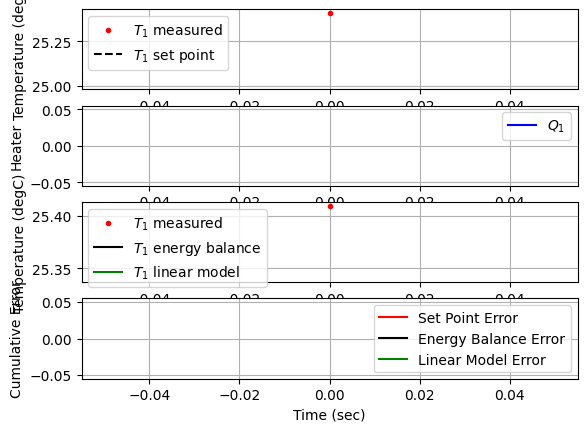

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
   2.6  25.00  25.38   0.00  -0.17   0.00   0.00


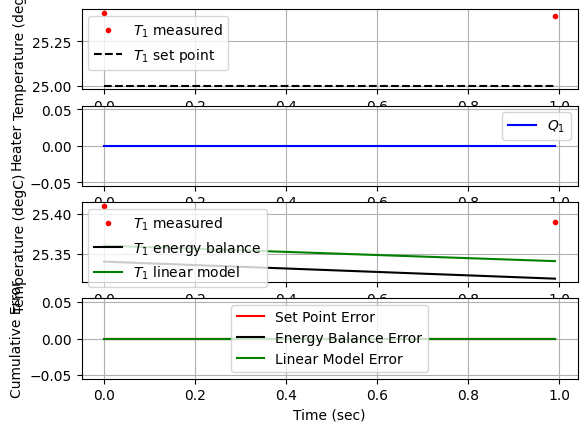

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
   3.6  25.00  25.35   0.00  -0.15   0.00   0.00


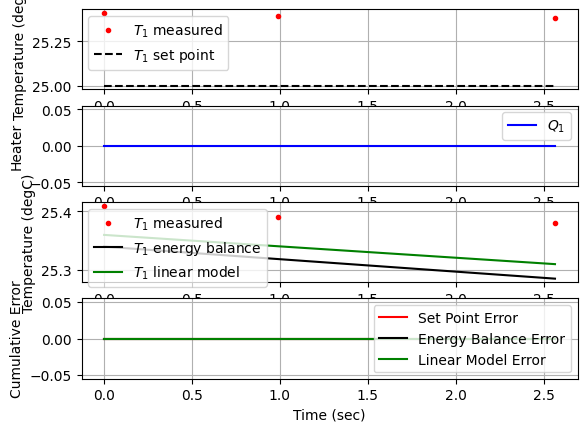

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
   4.8  25.00  25.33   0.00  -0.14   0.00   0.00


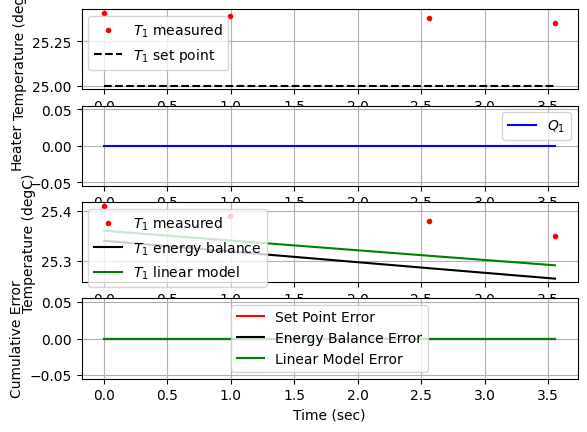

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
   5.9  25.00  25.39   0.00  -0.17   0.00  -0.01


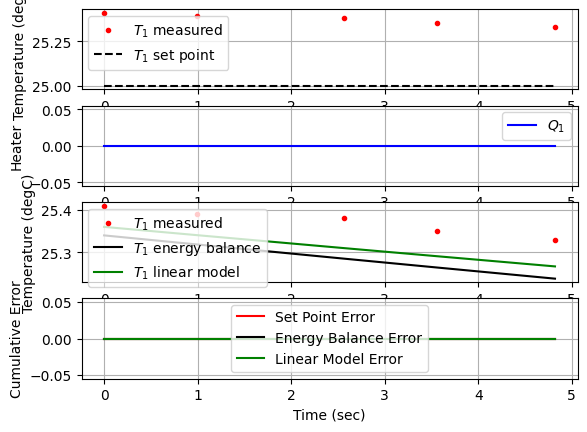

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
   6.9  25.00  25.37   0.00  -0.16   0.00   0.00


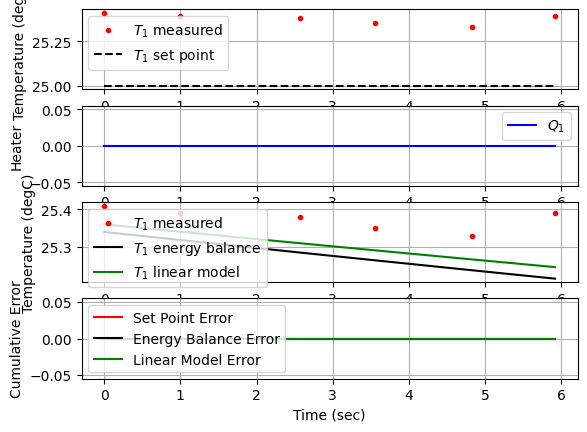

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
   7.9  25.00  25.39   0.00  -0.17   0.00  -0.00


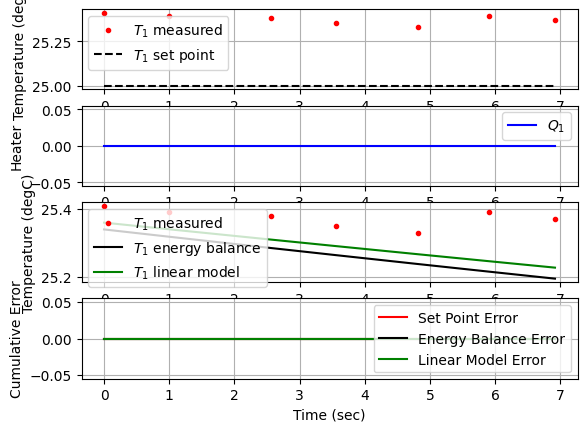

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
   9.0  25.00  25.36   0.00  -0.16   0.00   0.00


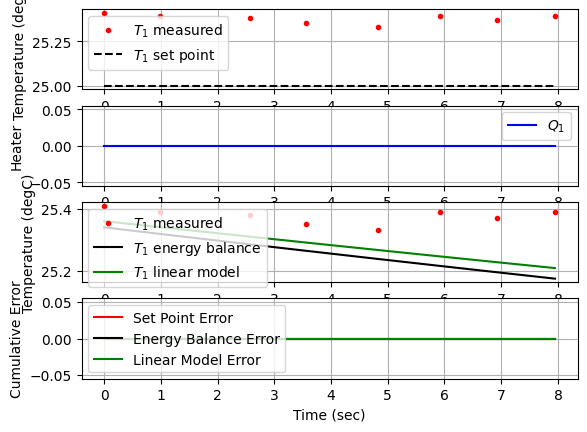

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
  10.0  25.00  25.39   0.00  -0.17   0.00  -0.00


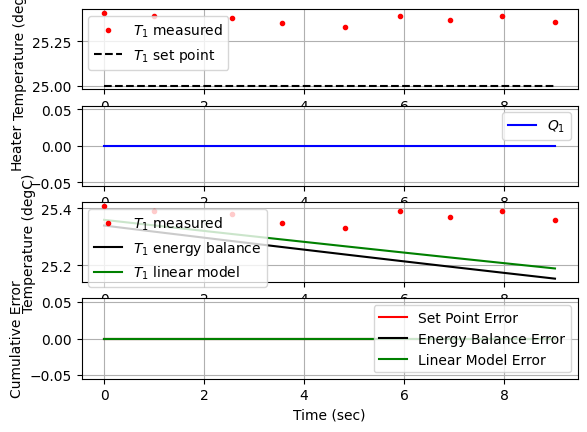

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
  11.0  25.00  25.39   0.00  -0.17   0.00  -0.00


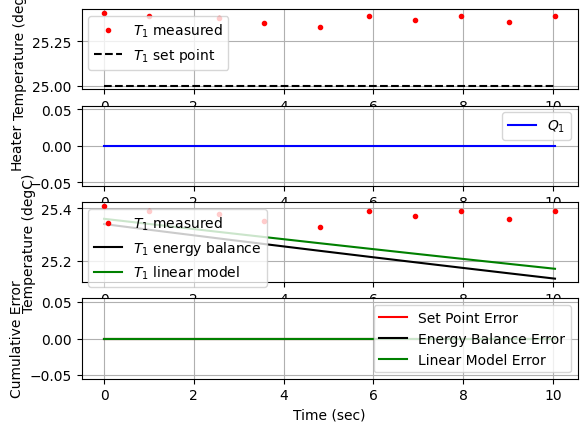

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  12.1  25.00  25.35   0.00  -0.15   0.00   0.01


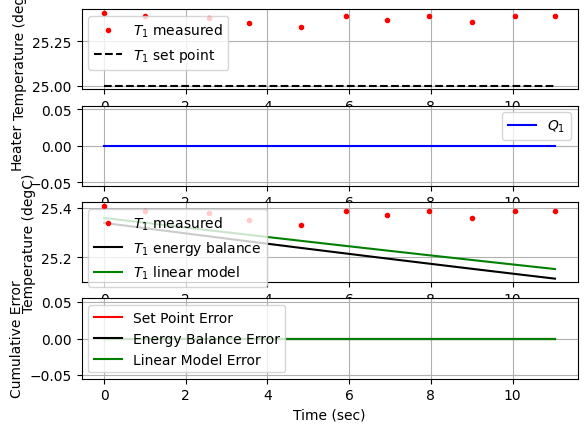

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
  13.1  25.00  25.37   0.00  -0.16   0.00  -0.00


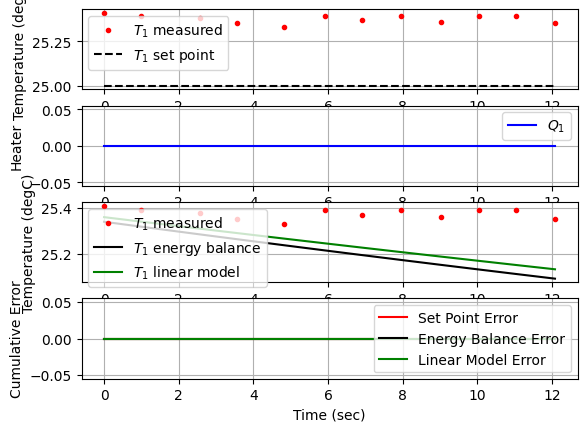

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  14.5  25.00  25.33   0.00  -0.14   0.00   0.00


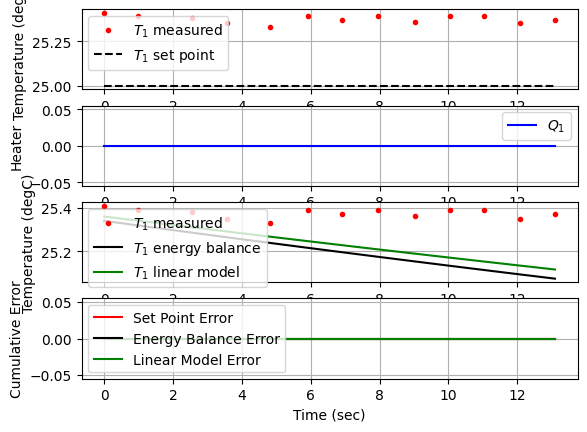

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
  15.5  25.00  25.34   0.00  -0.15   0.00  -0.00


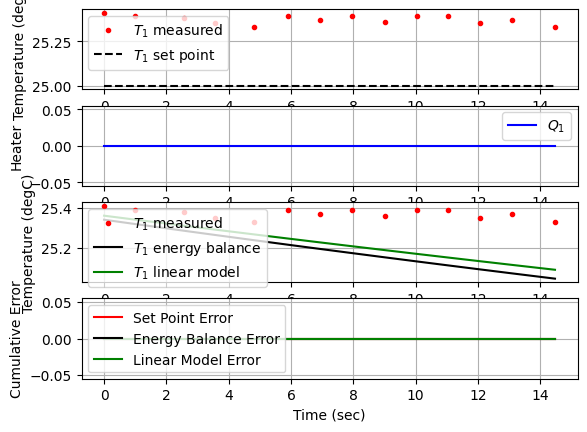

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
  16.5  25.00  25.48   0.00  -0.21   0.00  -0.02


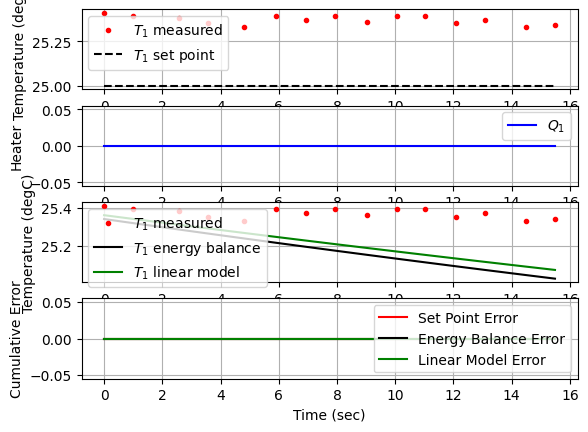

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
  17.6  25.00  25.40   0.00  -0.17   0.00   0.01


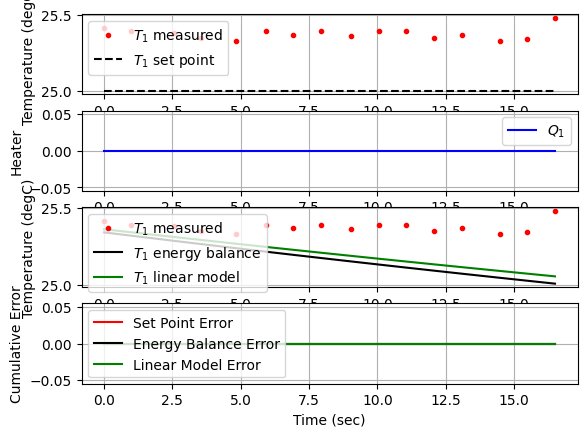

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  18.7  25.00  25.42   0.00  -0.18   0.00  -0.00


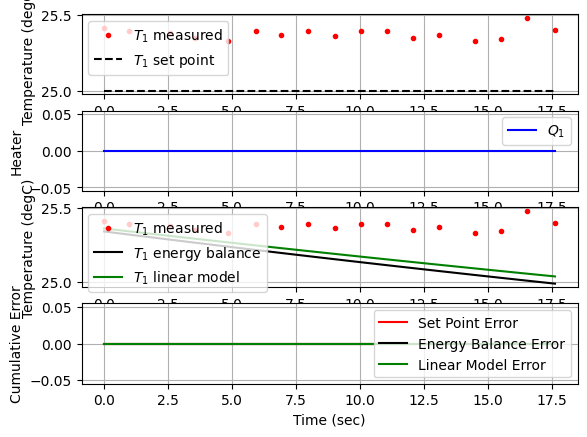

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
  19.7  25.00  25.38   0.00  -0.17   0.00   0.01


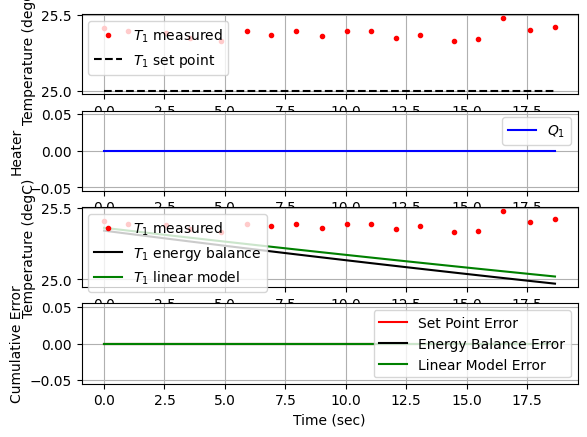

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
  20.7  25.00  25.43   0.00  -0.19   0.00  -0.01


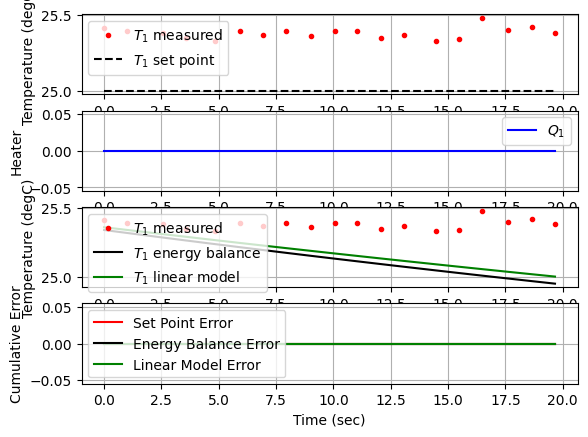

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  22.2  25.00  25.37   0.00  -0.16   0.00   0.01


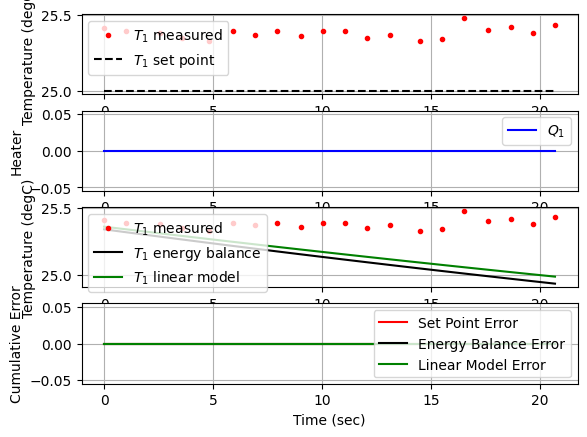

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  23.2  25.00  25.36   0.00  -0.16   0.00   0.00


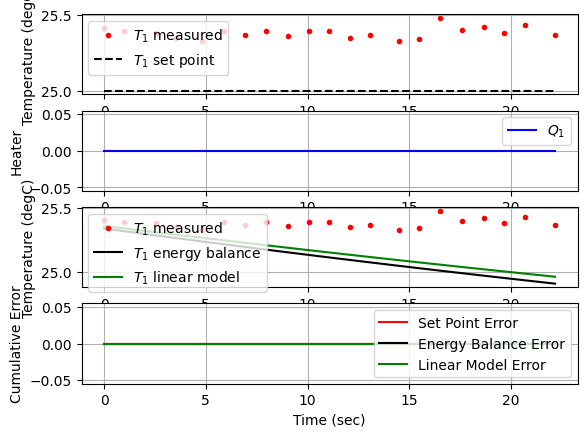

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  24.1  25.00  25.40   0.00  -0.18   0.00  -0.01


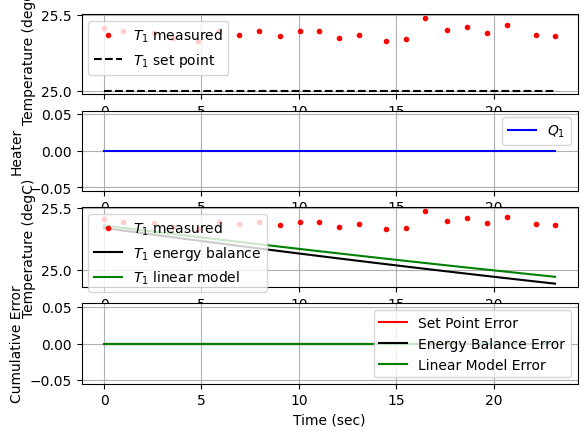

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  25.1  25.00  25.37   0.00  -0.16   0.00   0.00


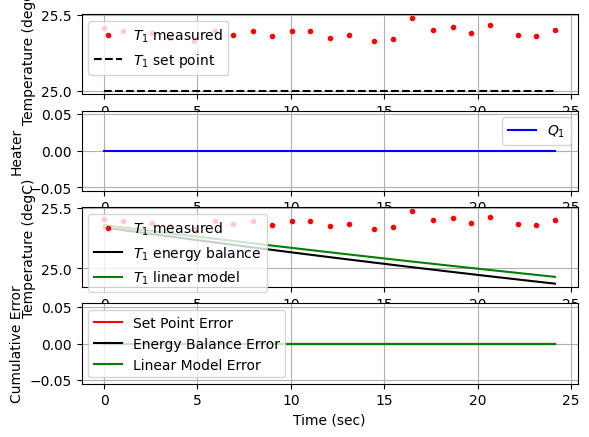

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  26.1  25.00  25.34   0.00  -0.15   0.00   0.00


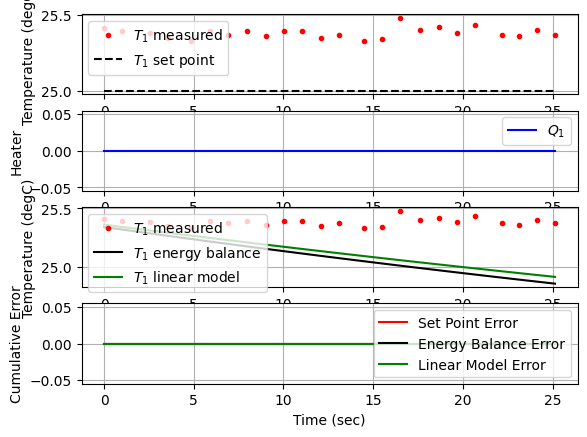

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  27.1  25.00  25.40   0.00  -0.18   0.00  -0.01


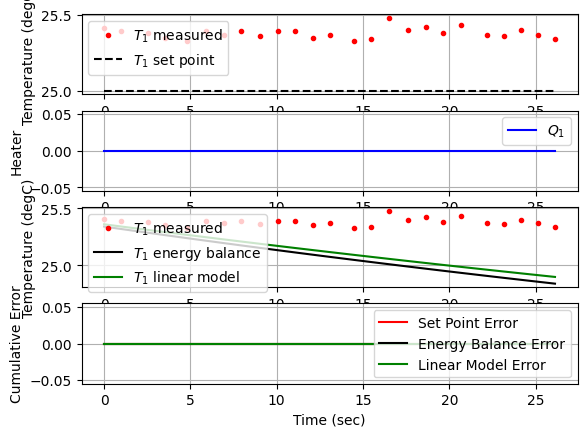

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  28.1  25.00  25.32   0.00  -0.14   0.00   0.01


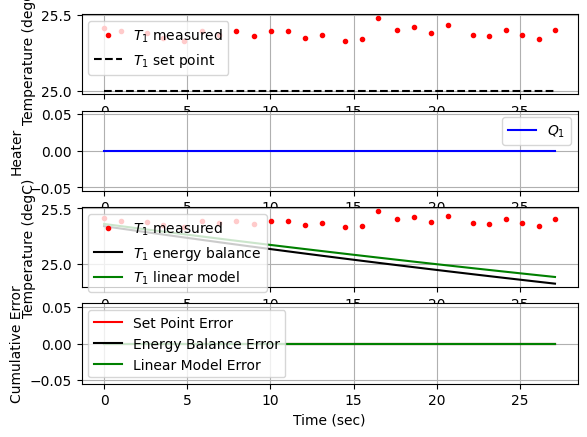

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  29.1  25.00  25.27   0.00  -0.12   0.00   0.01


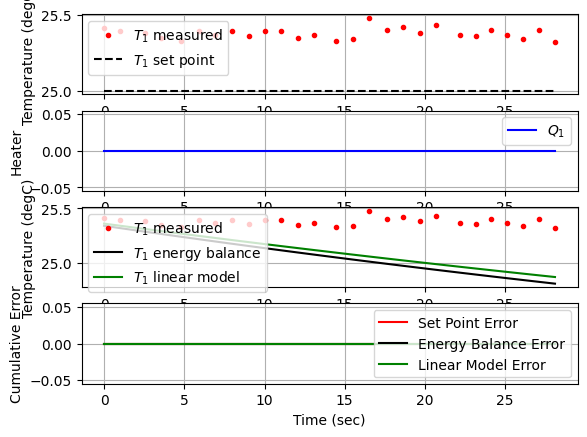

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
  30.1  25.00  25.33   0.00  -0.14   0.00  -0.01


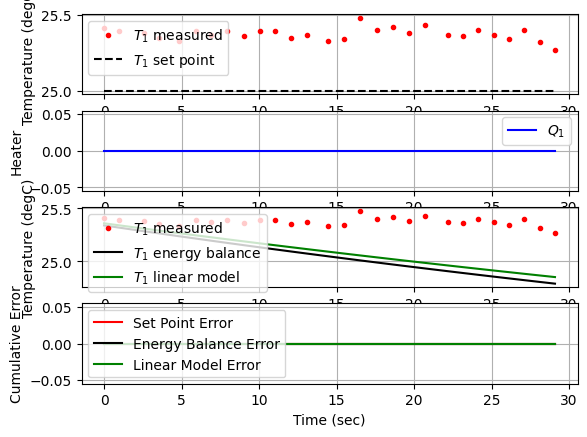

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
  31.5  25.00  25.29   0.00  -0.13   0.00   0.00


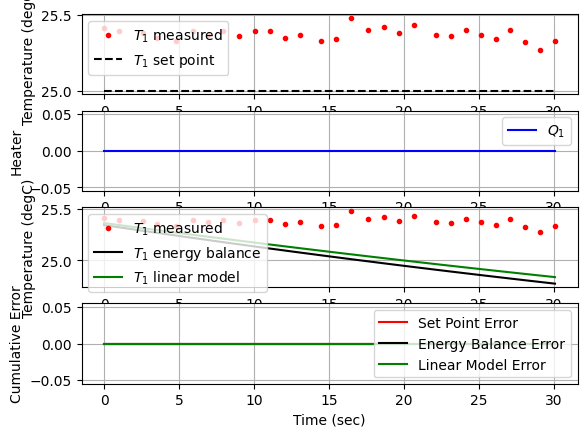

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
  32.5  25.00  25.32   0.00  -0.14   0.00  -0.00


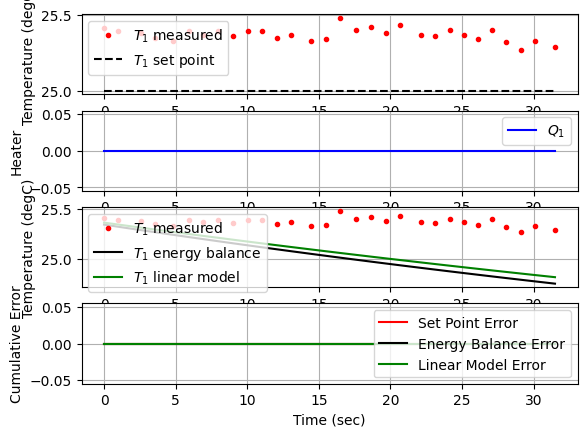

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
  33.6  25.00  25.37   0.00  -0.16   0.00  -0.01


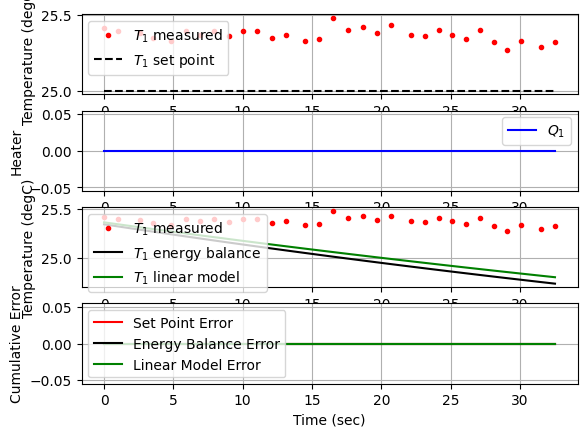

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  34.6  25.00  25.37   0.00  -0.16   0.00  -0.00


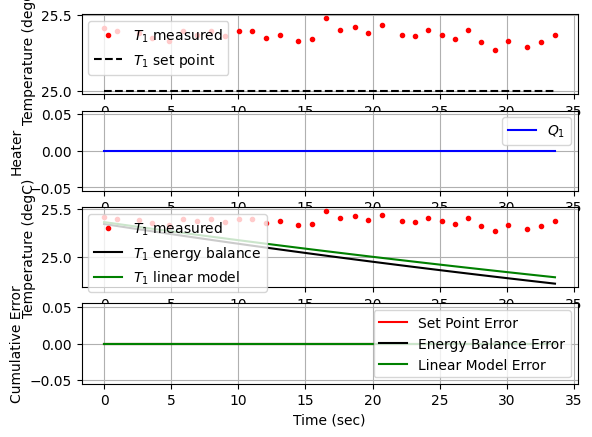

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  35.8  25.00  25.33   0.00  -0.14   0.00   0.00


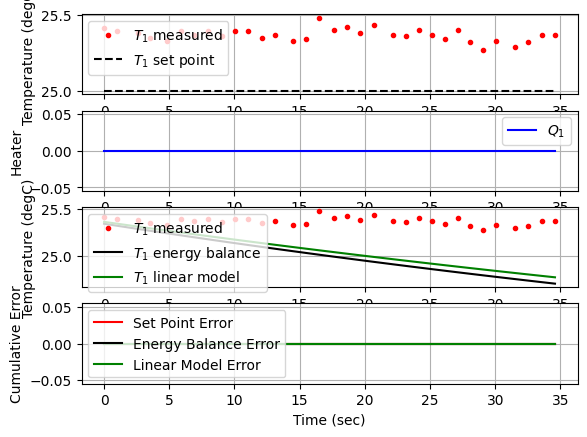

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  36.8  25.00  25.36   0.00  -0.16   0.00  -0.00


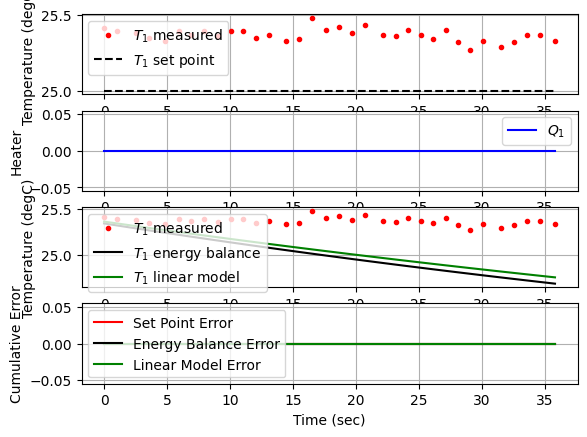

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  37.8  25.00  25.34   0.00  -0.15   0.00   0.00


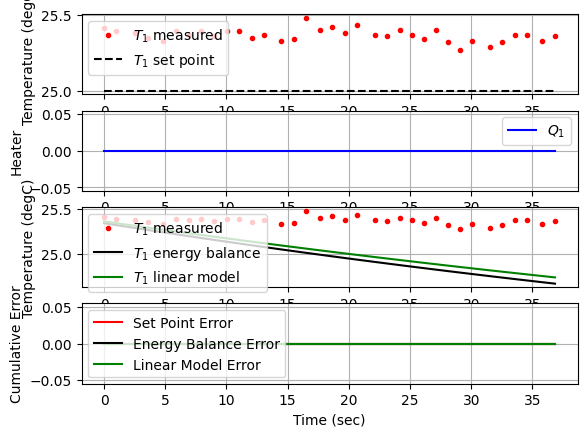

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
  39.1  25.00  25.35   0.00  -0.15   0.00  -0.00


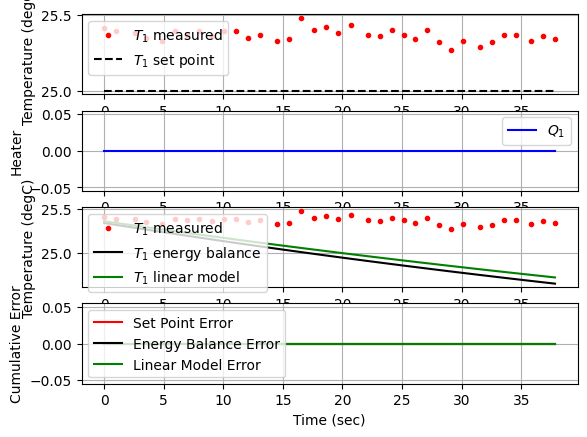

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
  40.2  25.00  25.37   0.00  -0.16   0.00  -0.00


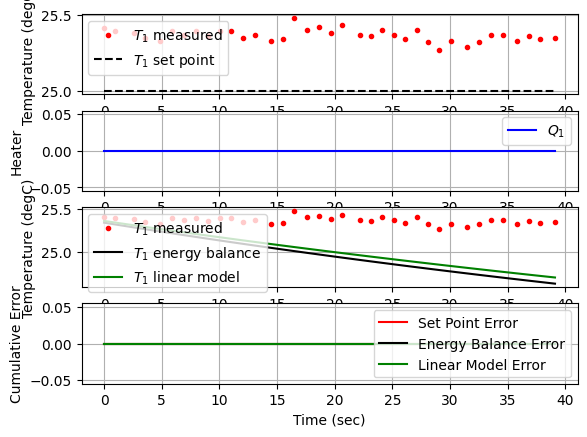

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  41.2  25.00  25.36   0.00  -0.16   0.00   0.00


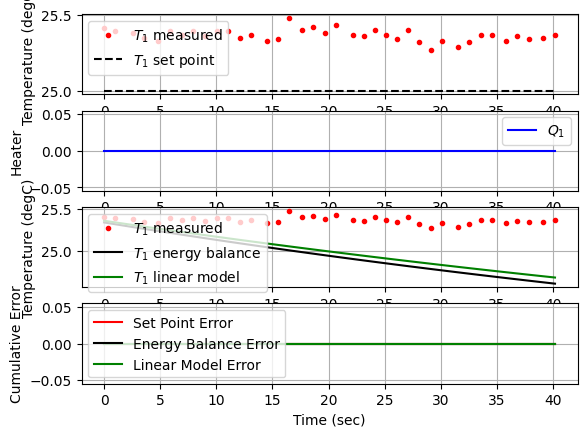

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  42.3  25.00  25.34   0.00  -0.15   0.00   0.00


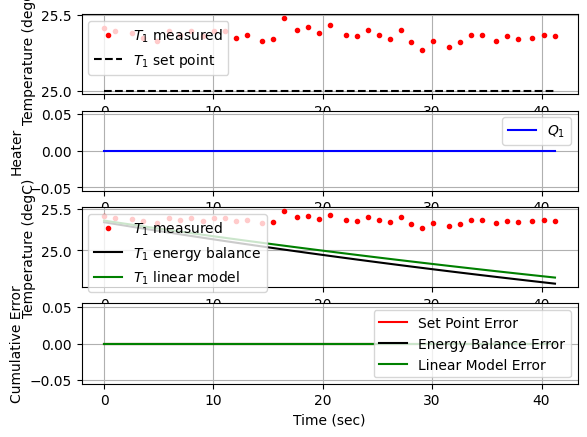

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
  43.3  25.00  25.38   0.00  -0.17   0.00  -0.01


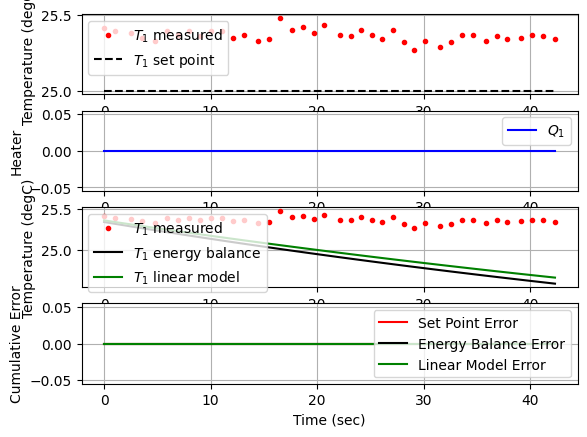

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
  44.3  25.00  25.35   0.00  -0.15   0.00   0.00


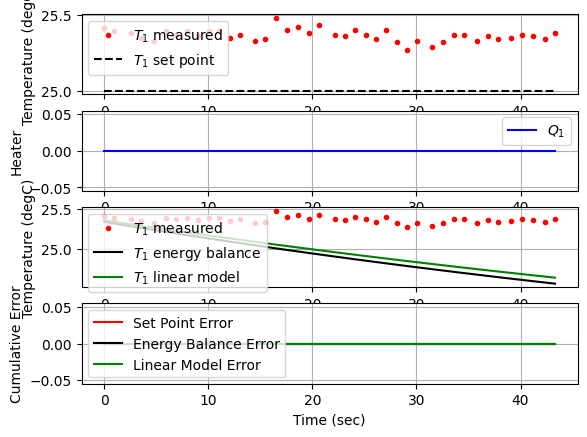

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
  45.3  25.00  25.30   0.00  -0.13   0.00   0.01


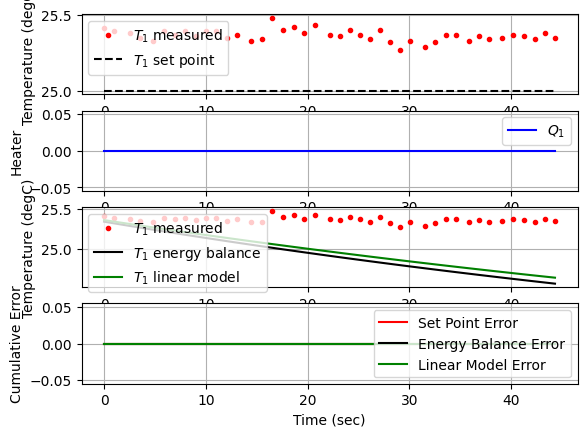

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
  46.3  25.00  25.42   0.00  -0.18   0.00  -0.02


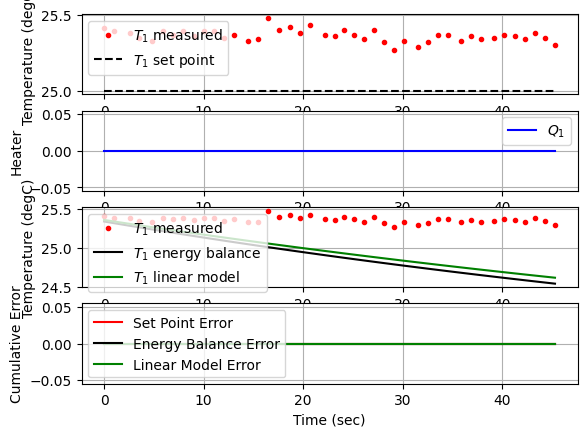

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  47.3  25.00  25.43   0.00  -0.19   0.00  -0.00


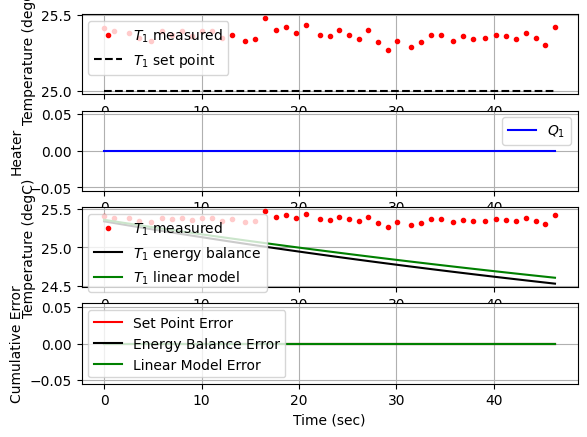

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
  48.7  25.00  25.36   0.00  -0.16   0.00   0.01


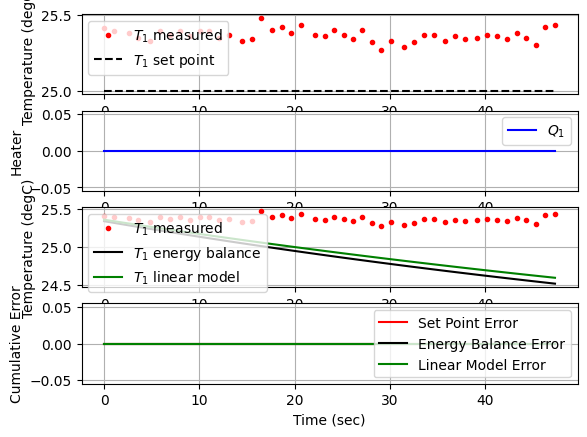

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  49.7  25.00  25.37   0.00  -0.16   0.00  -0.00


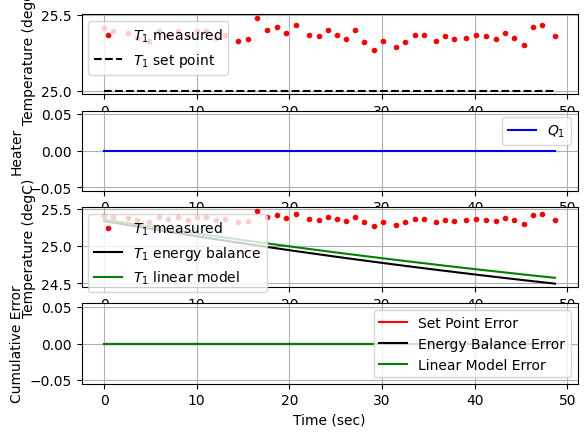

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  50.7  25.00  25.31   0.00  -0.14   0.00   0.01


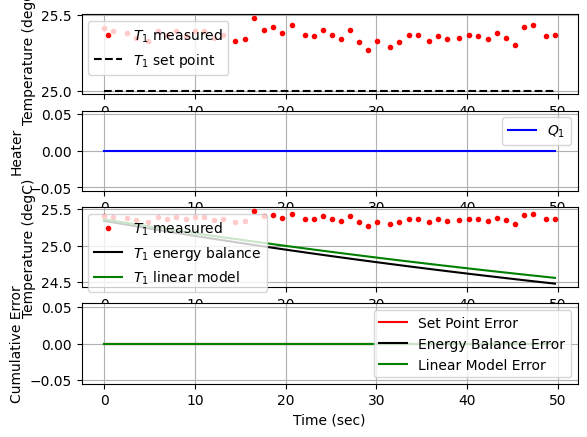

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
  51.7  25.00  25.28   0.00  -0.12   0.00   0.00


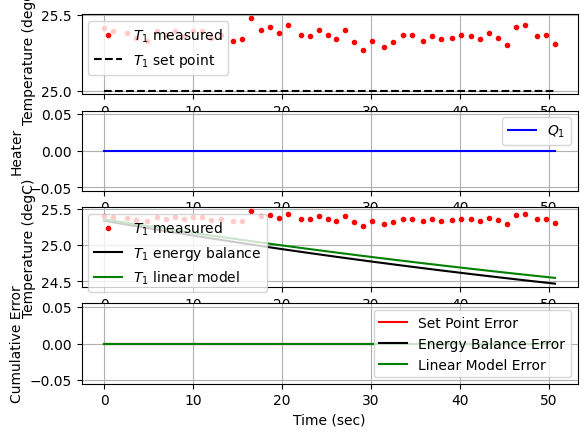

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  52.7  25.00  25.35   0.00  -0.15   0.00  -0.01


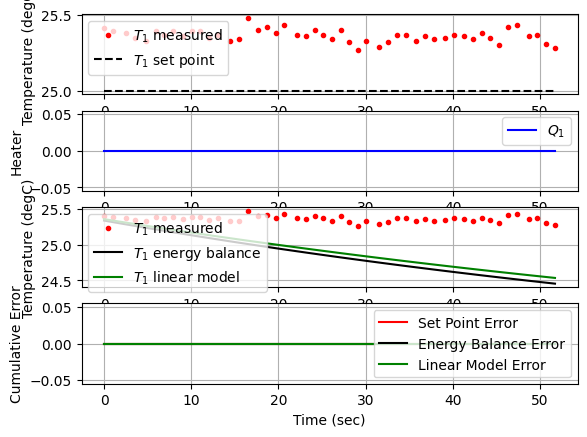

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  53.8  25.00  25.36   0.00  -0.16   0.00  -0.00


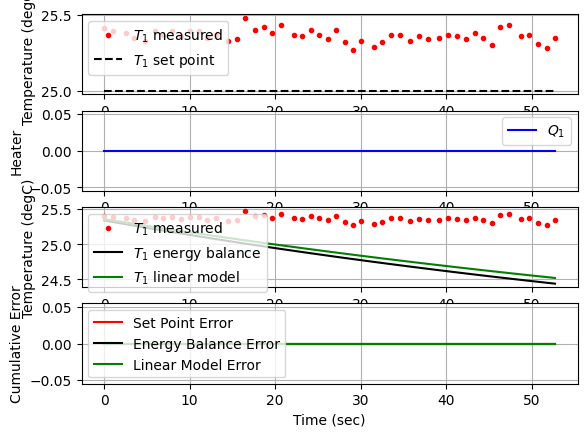

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  54.7  25.00  25.42   0.00  -0.18   0.00  -0.01


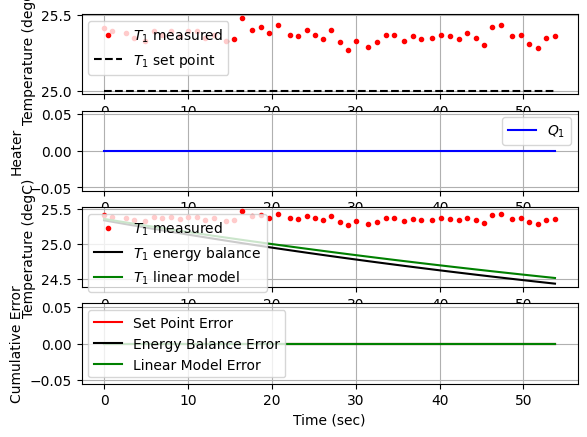

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
  55.7  25.00  25.34   0.00  -0.15   0.00   0.01


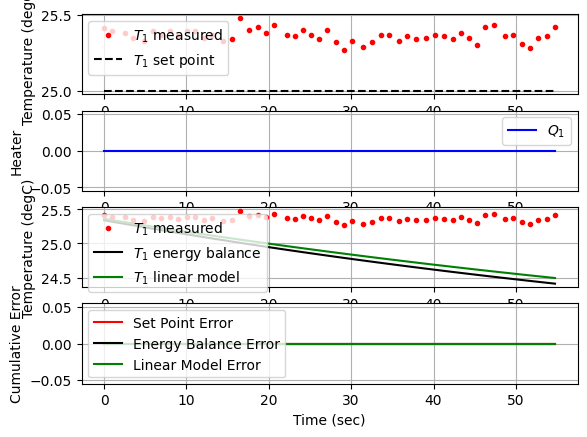

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
  57.1  25.00  25.27   0.00  -0.12   0.00   0.01


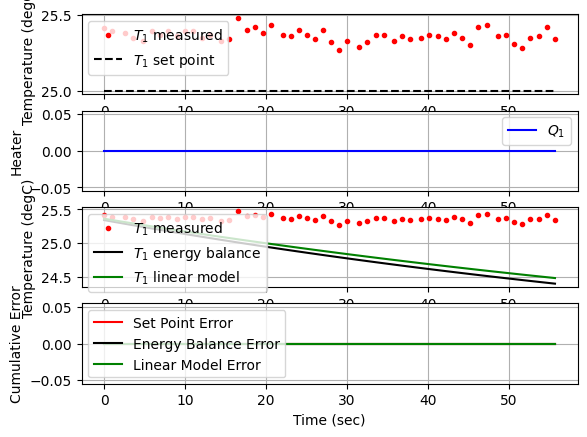

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
  58.1  25.00  25.38   0.00  -0.17   0.00  -0.01


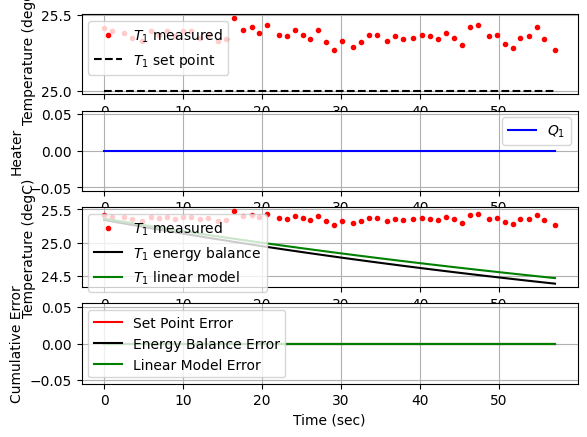

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
  59.1  25.00  25.33   0.00  -0.14   0.00   0.01


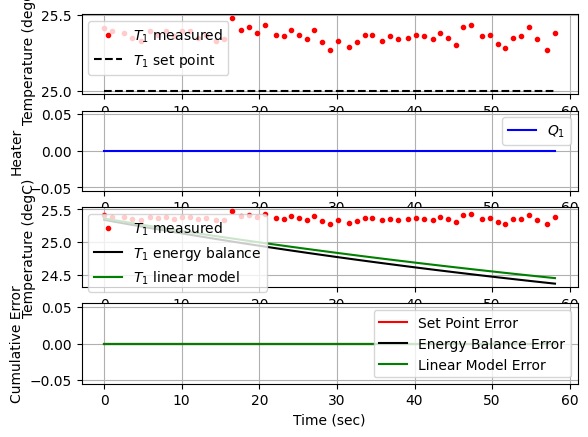

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
  60.1  25.00  25.40   0.00  -0.18   0.00  -0.01


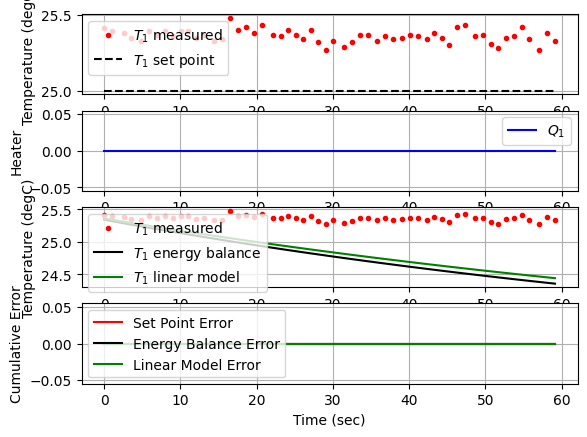

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  61.2  25.00  25.41   0.00  -0.18   0.00  -0.00


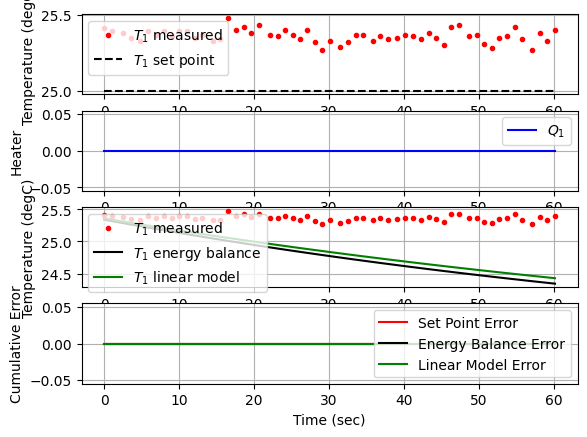

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
  62.2  25.00  25.37   0.00  -0.16   0.00   0.01


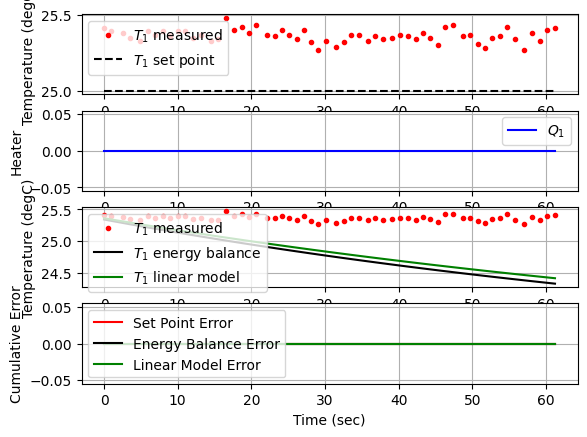

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  63.3  25.00  25.45   0.00  -0.20   0.00  -0.01


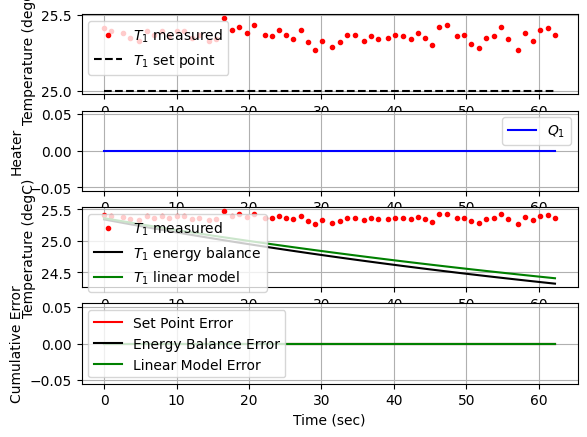

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
  64.4  45.00  25.34  35.15   8.75  26.39   0.01


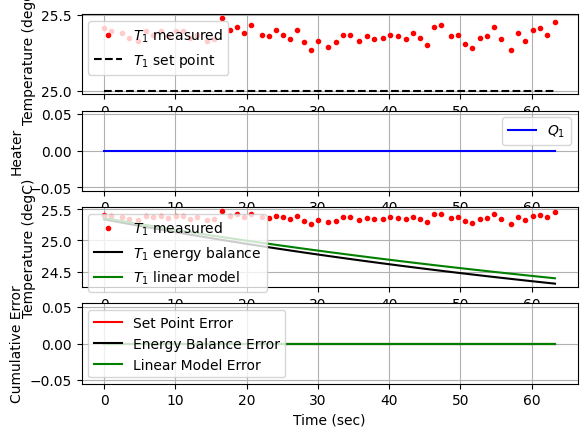

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
  65.8  45.00  25.42  68.79   8.71  60.08  -0.01


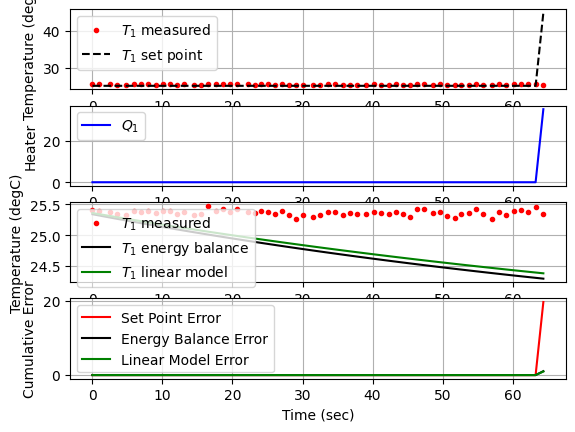

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  66.8  45.00  25.41  92.81   8.72  84.09   0.00


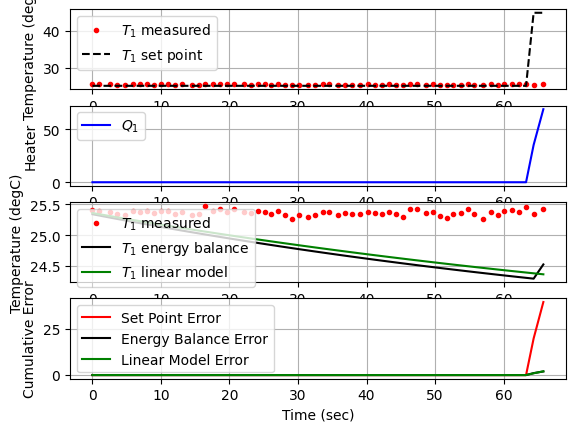

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  67.8  45.00  25.39 100.00   8.73  84.09   0.00


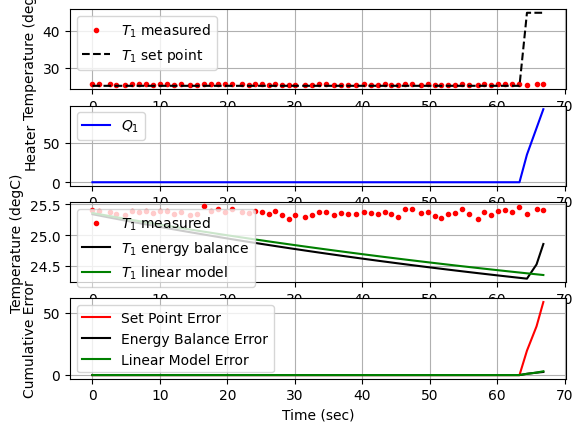

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
  68.8  45.00  25.35 100.00   8.75  84.09   0.00


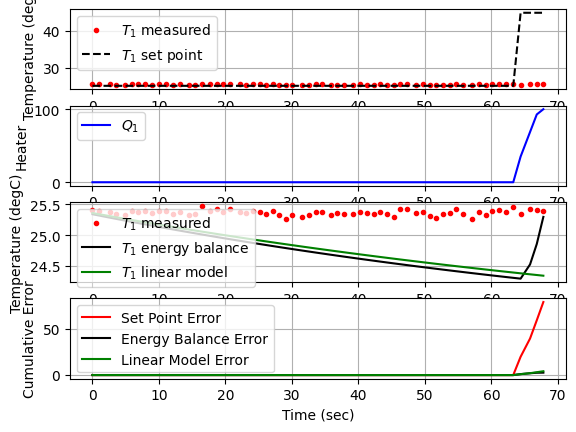

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
  69.8  45.00  25.39 100.00   8.73  84.09  -0.00


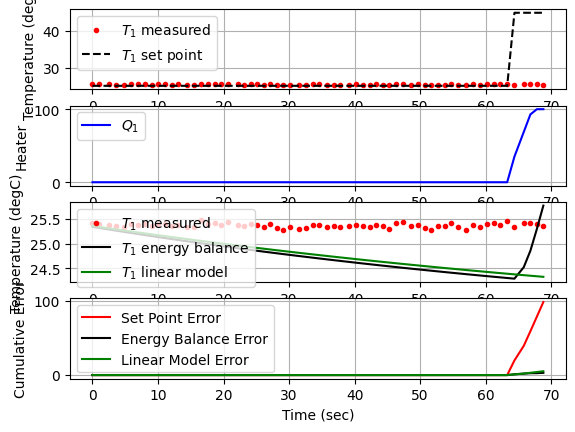

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
  70.8  45.00  25.37 100.00   8.74  84.09   0.00


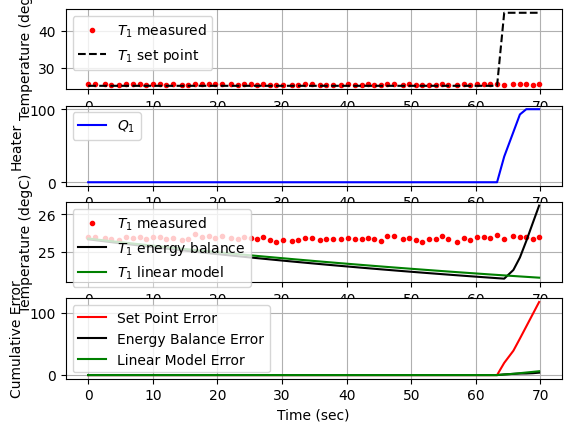

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
  71.8  45.00  25.42 100.00   8.71  84.09  -0.01


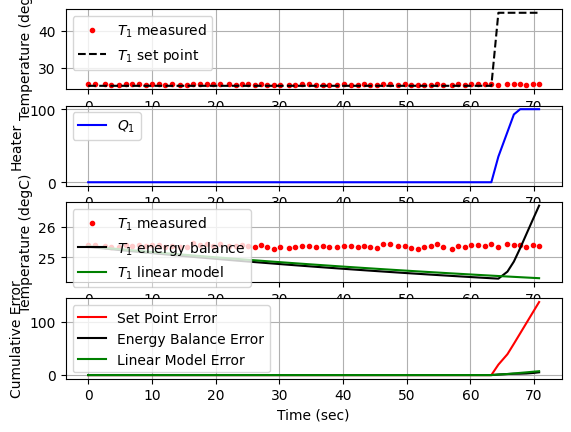

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  72.8  45.00  25.30 100.00   8.77  84.09   0.01


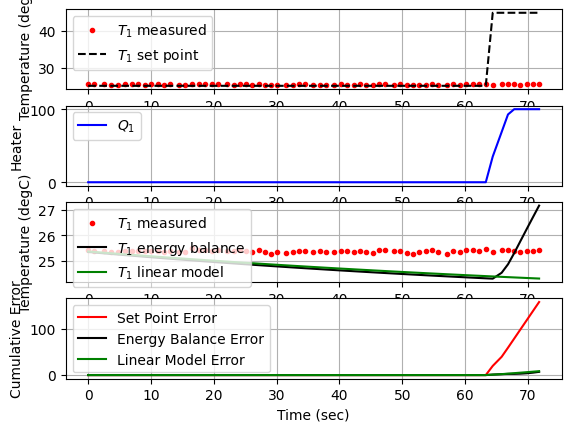

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  74.1  45.00  25.35 100.00   8.75  84.09  -0.00


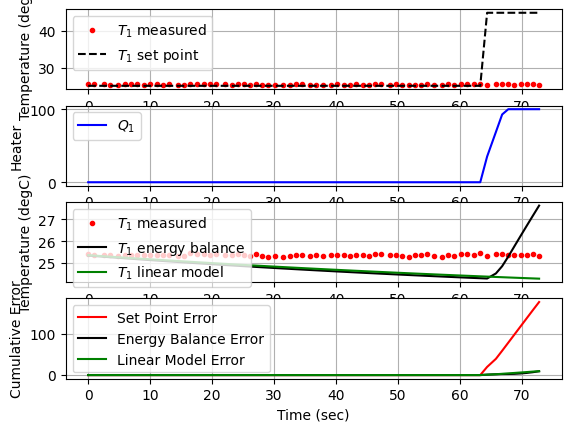

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
  75.1  45.00  25.39 100.00   8.73  84.09  -0.00


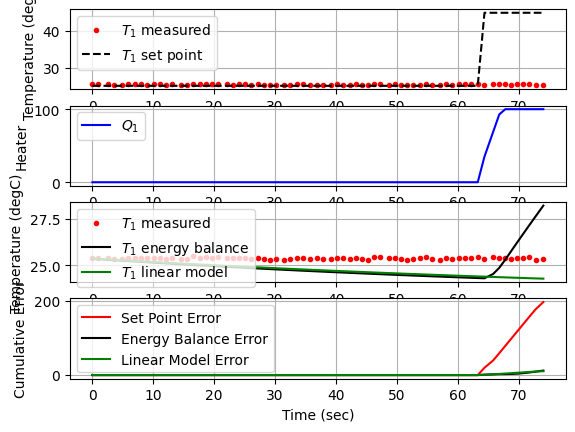

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
  76.1  45.00  25.32 100.00   8.76  84.09   0.01


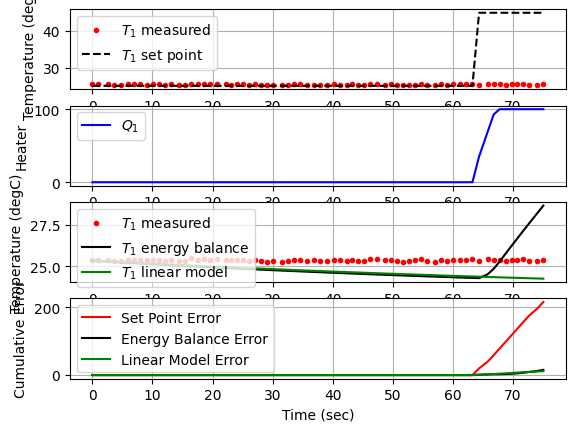

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
  77.1  45.00  25.32 100.00   8.76  84.09  -0.00


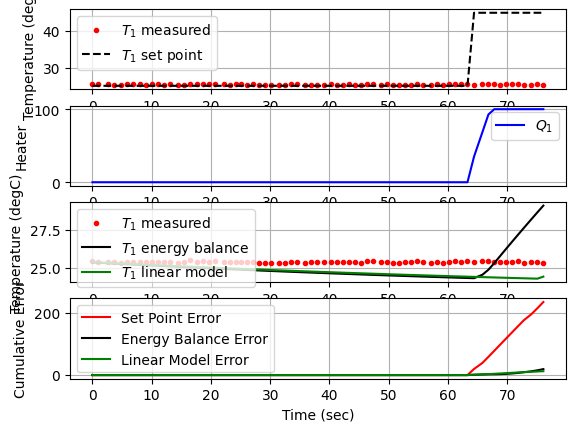

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
  78.1  45.00  25.42 100.00   8.71  84.09  -0.01


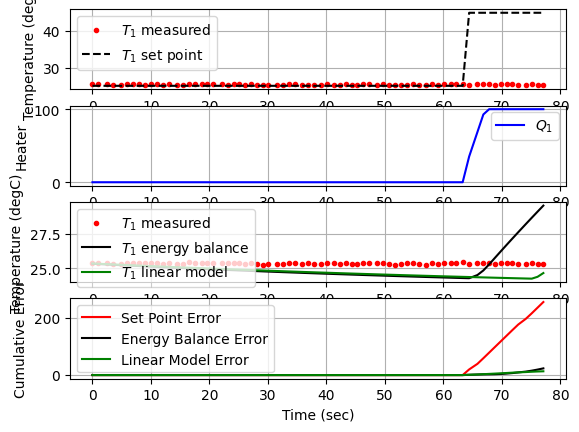

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  79.2  45.00  25.37 100.00   8.74  84.09   0.01


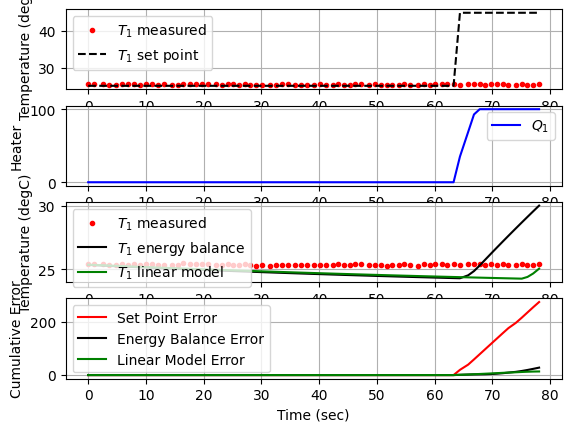

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  80.2  45.00  25.41 100.00   8.72  84.09  -0.00


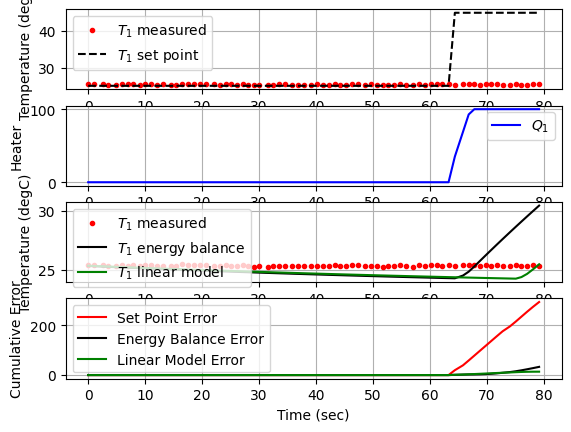

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  81.3  45.00  25.42 100.00   8.71  84.09  -0.00


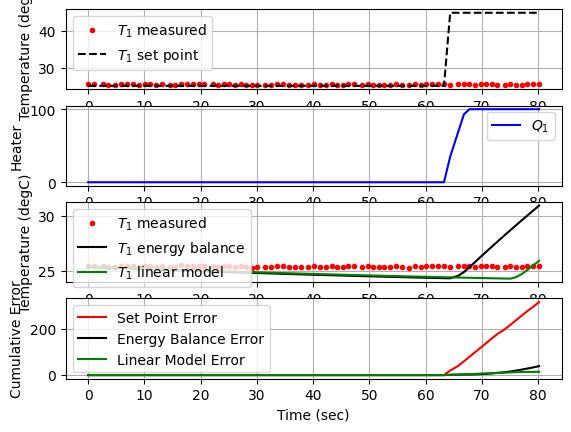

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
  82.7  45.00  25.38 100.00   8.73  84.09   0.00


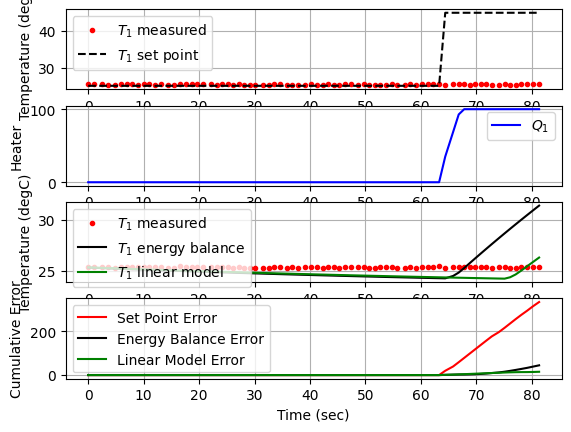

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
  83.8  45.00  25.42 100.00   8.71  84.09  -0.00


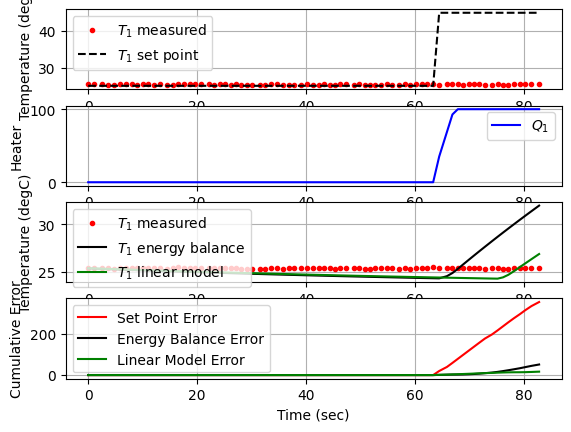

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  84.8  45.00  25.41 100.00   8.72  84.09   0.00


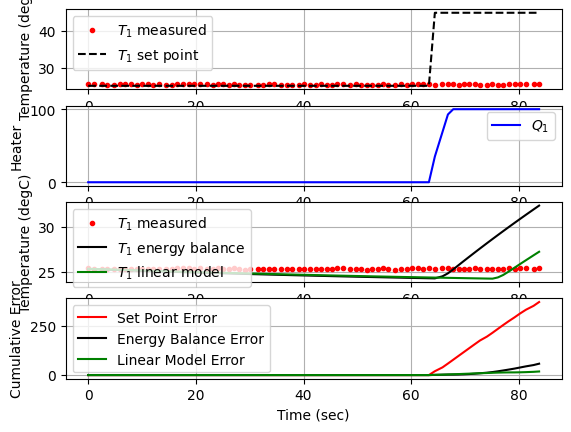

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
  85.8  45.00  25.36 100.00   8.74  84.09   0.01


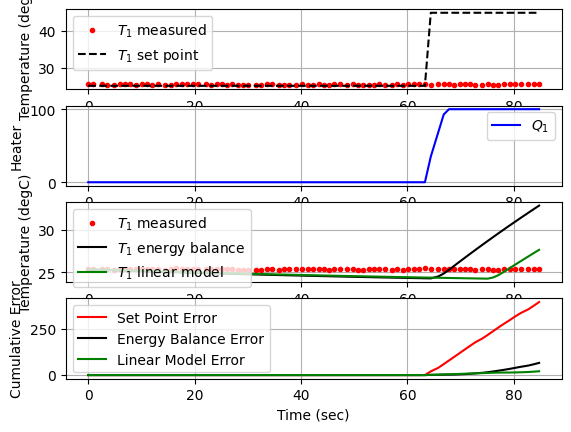

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  86.7  45.00  25.40 100.00   8.72  84.09  -0.00


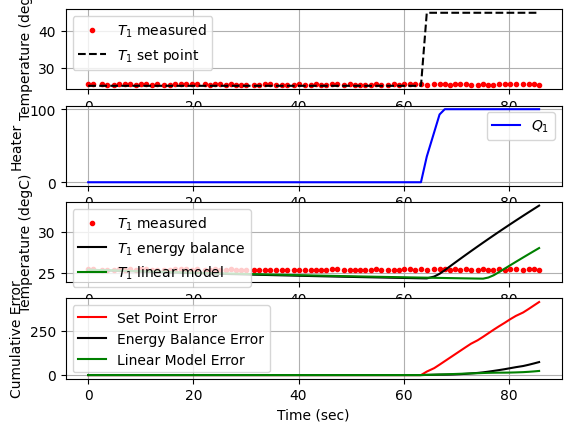

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  87.7  45.00  25.40 100.00   8.72  84.09  -0.00


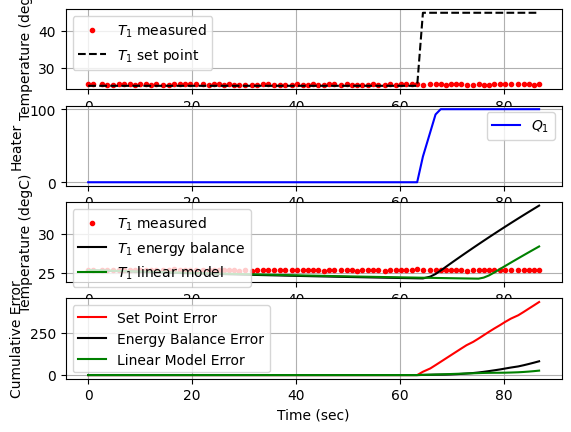

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
  88.7  45.00  25.40 100.00   8.72  84.09  -0.00


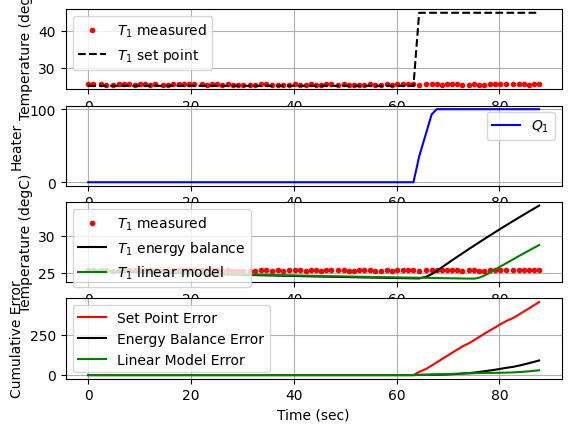

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
  89.7  45.00  25.39 100.00   8.73  84.09   0.00


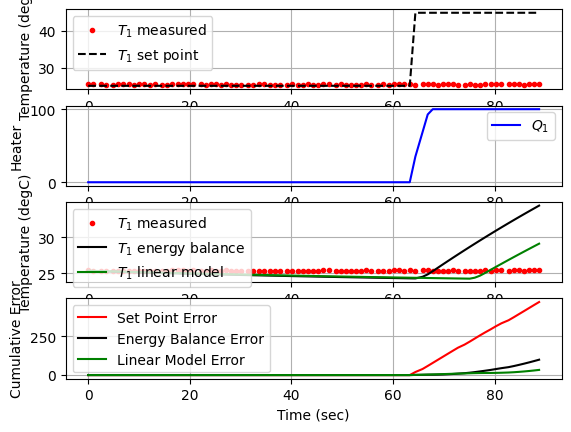

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
  90.7  45.00  25.46 100.00   8.70  84.09  -0.01


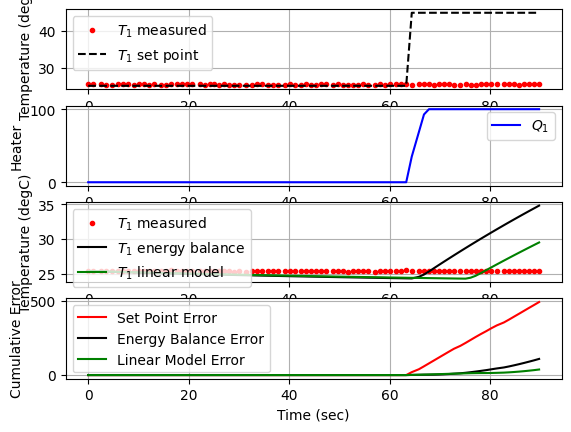

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
  92.0  45.00  25.47 100.00   8.69  84.09  -0.00


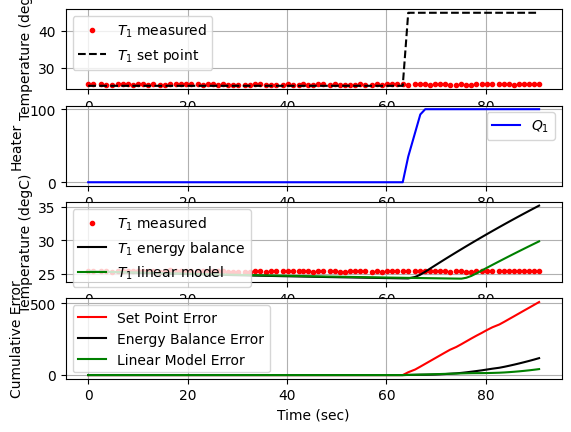

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  93.0  45.00  25.40 100.00   8.72  84.09   0.01


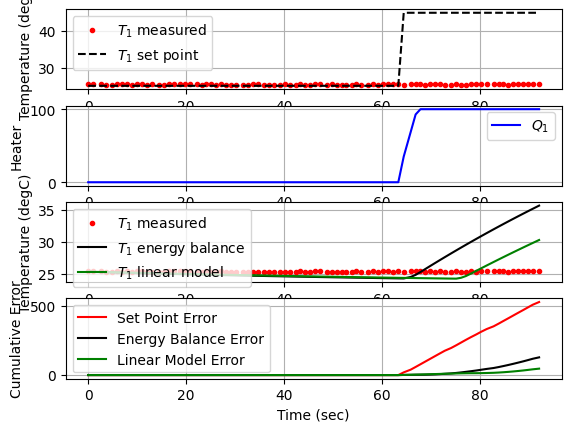

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
  94.0  45.00  25.35 100.00   8.75  84.09   0.01


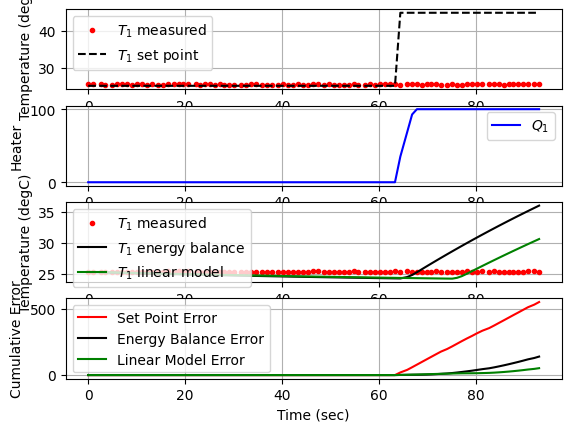

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
  95.0  45.00  25.43 100.00   8.71  84.09  -0.01


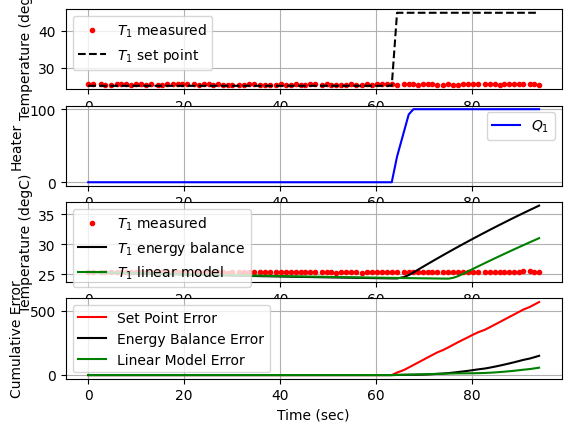

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  96.0  45.00  25.41 100.00   8.72  84.09   0.00


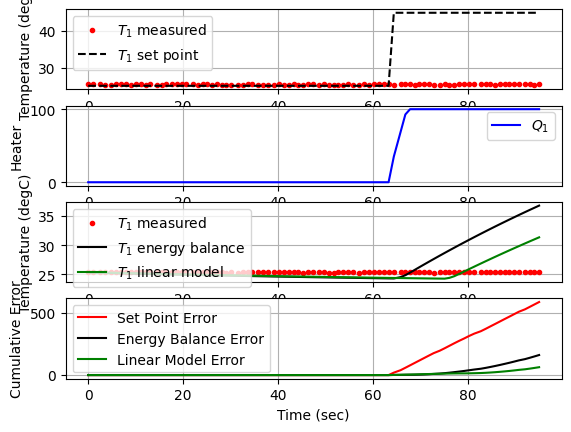

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  97.0  45.00  25.34 100.00   8.75  84.09   0.01


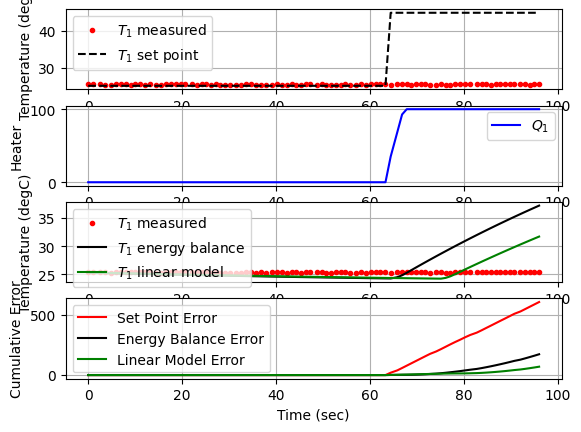

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
  98.0  45.00  25.35 100.00   8.75  84.09  -0.00


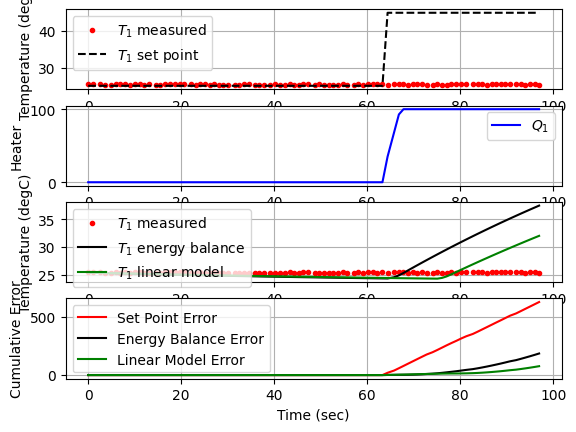

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
  99.0  45.00  25.38 100.00   8.73  84.09  -0.00


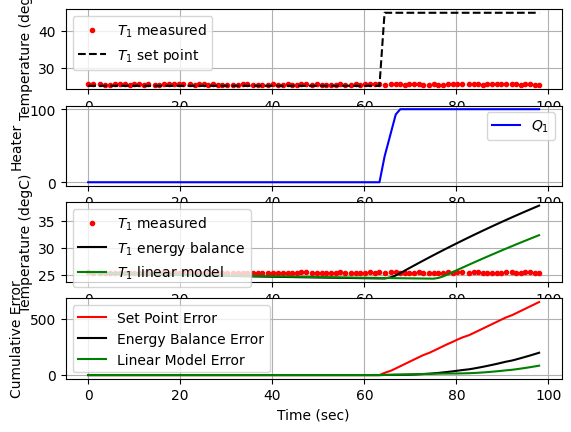

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 100.0  45.00  25.40 100.00   8.72  84.09  -0.00


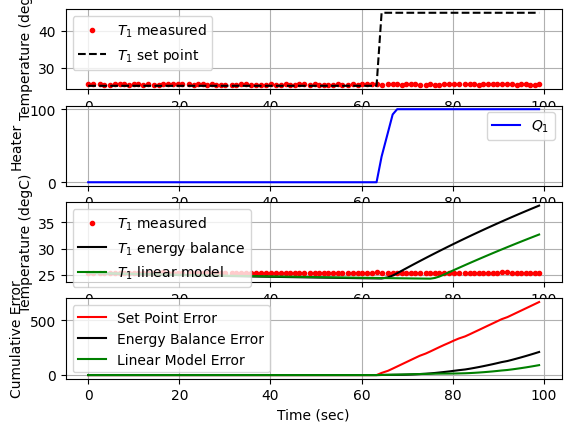

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 101.4  45.00  25.37 100.00   8.74  84.09   0.00


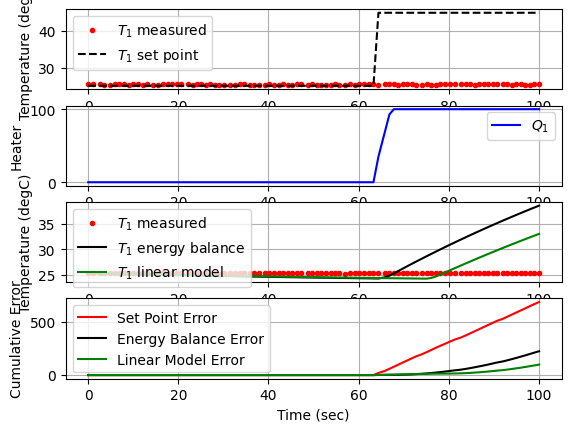

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
 102.4  45.00  25.41 100.00   8.72  84.09  -0.00


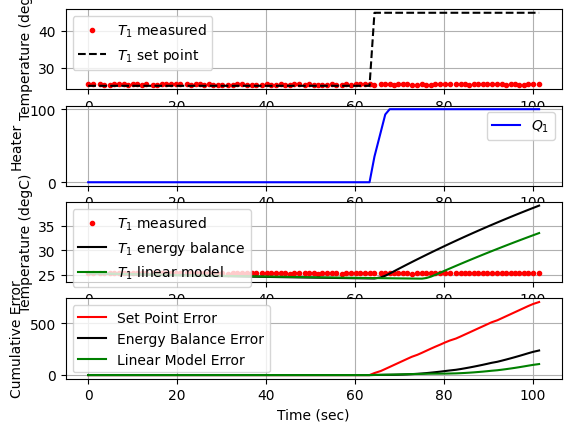

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
 103.4  45.00  25.51 100.00   8.67  84.09  -0.01


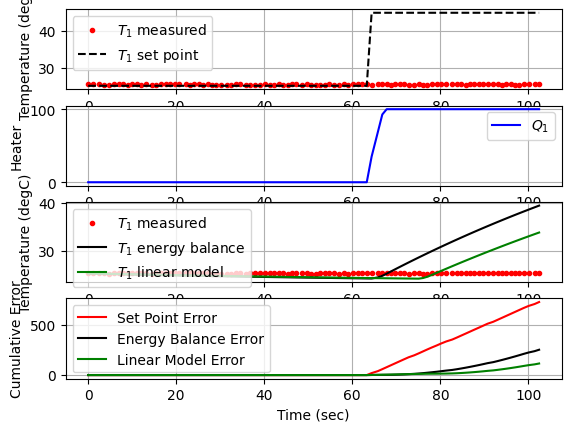

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
 104.4  45.00  25.49 100.00   8.68  84.09   0.00


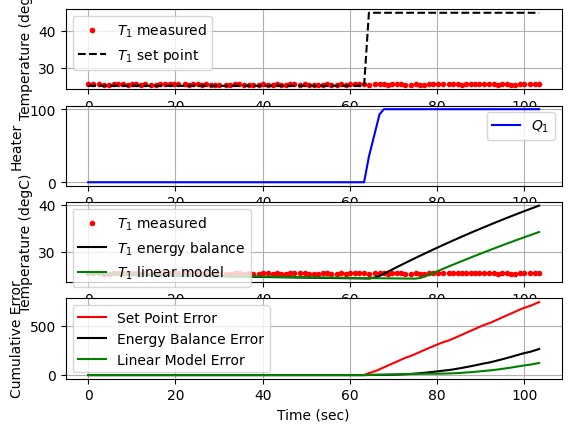

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
 105.4  45.00  25.46 100.00   8.70  84.09   0.00


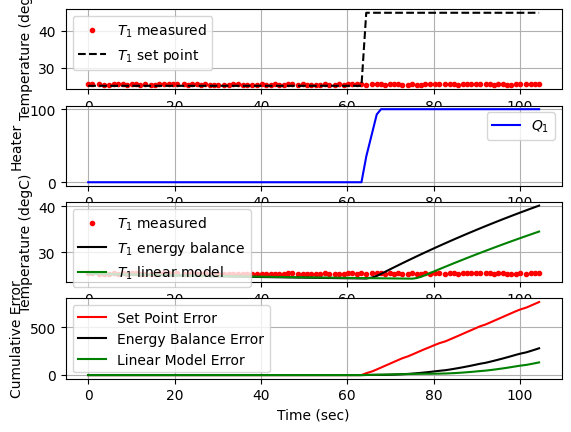

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
 106.4  45.00  25.46 100.00   8.70  84.09  -0.00


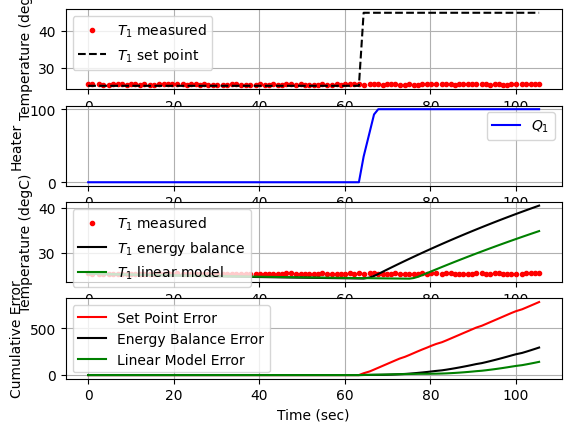

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 107.4  45.00  25.42 100.00   8.71  84.09   0.00


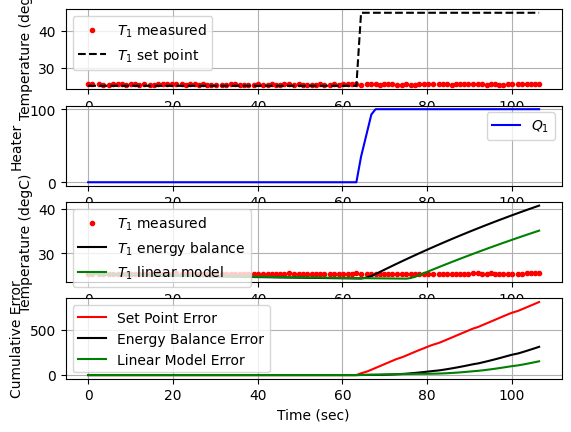

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 108.4  45.00  25.34 100.00   8.75  84.09   0.01


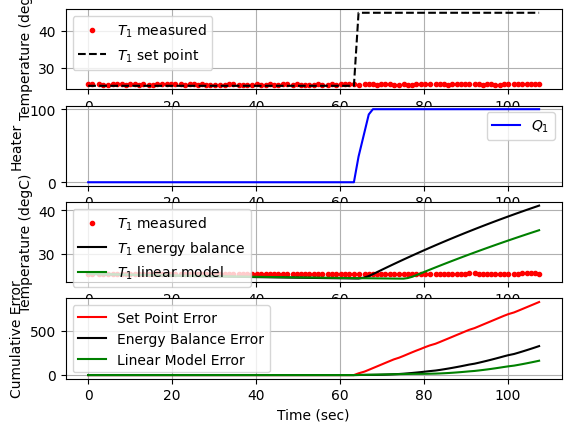

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
 109.4  45.00  25.38 100.00   8.73  84.09  -0.00


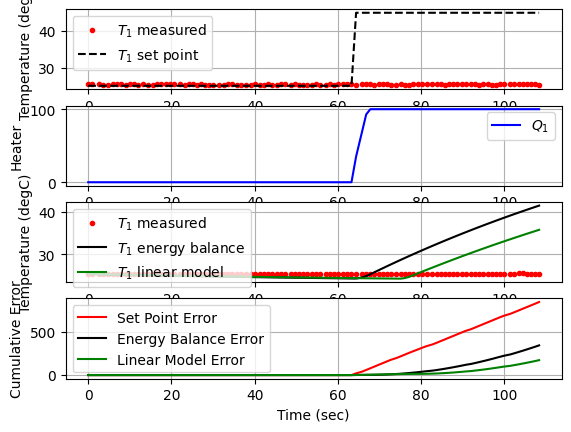

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 110.7  45.00  25.41 100.00   8.72  84.09  -0.00


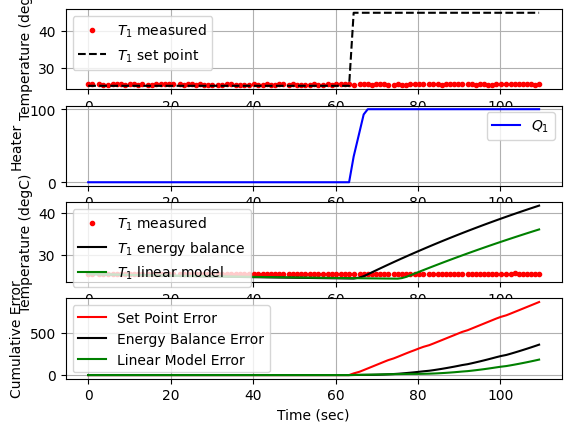

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 111.6  45.00  25.41 100.00   8.72  84.09  -0.00


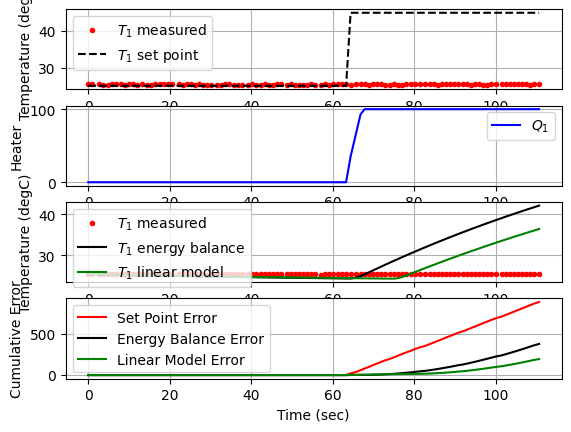

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 112.6  45.00  25.42 100.00   8.71  84.09  -0.00


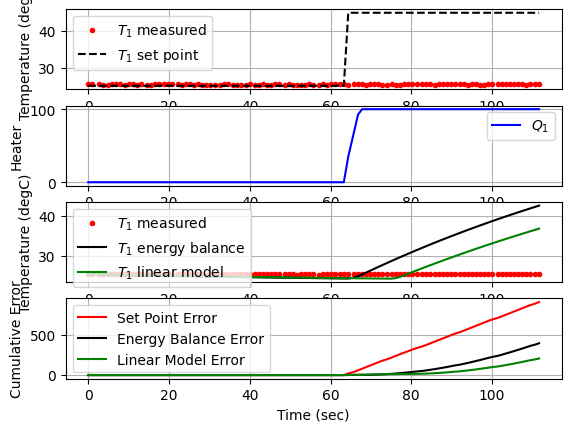

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 113.6  45.00  25.44 100.00   8.71  84.09  -0.00


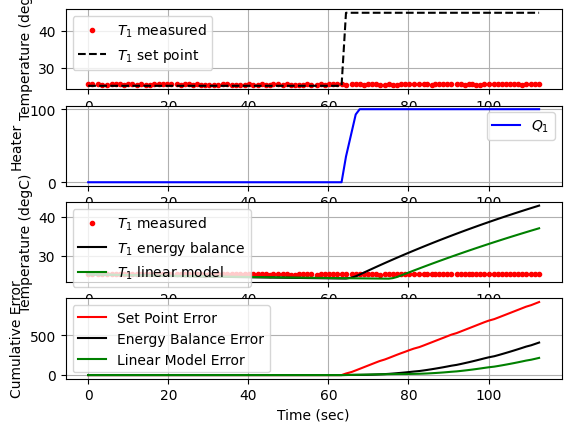

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
 114.6  45.00  25.40 100.00   8.72  84.09   0.00


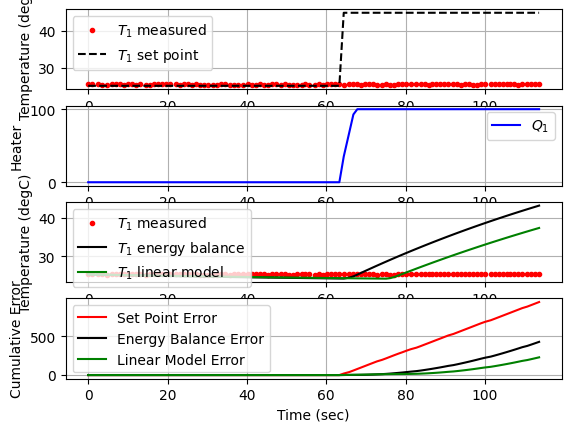

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
 115.6  45.00  25.41 100.00   8.72  84.09  -0.00


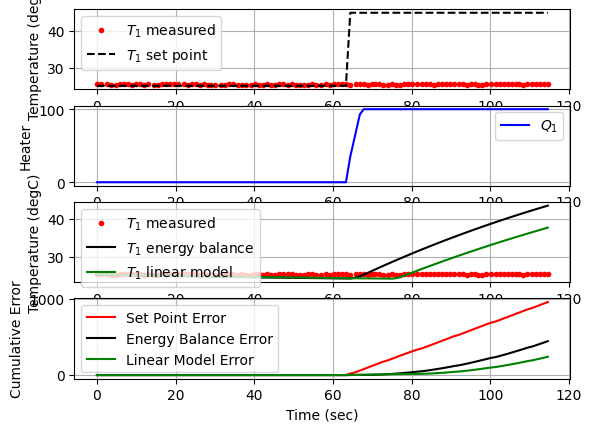

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 116.6  45.00  25.33 100.00   8.75  84.09   0.01


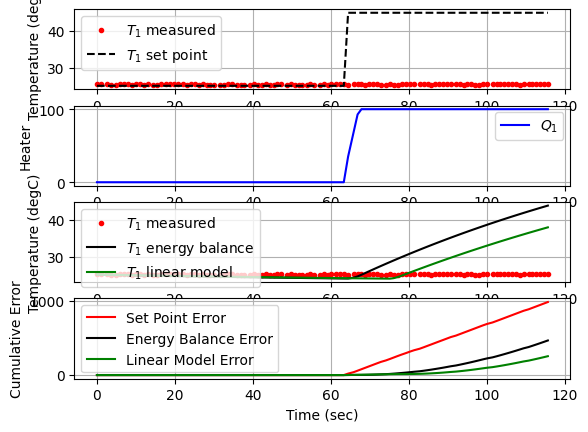

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
 117.6  45.00  25.34 100.00   8.75  84.09  -0.00


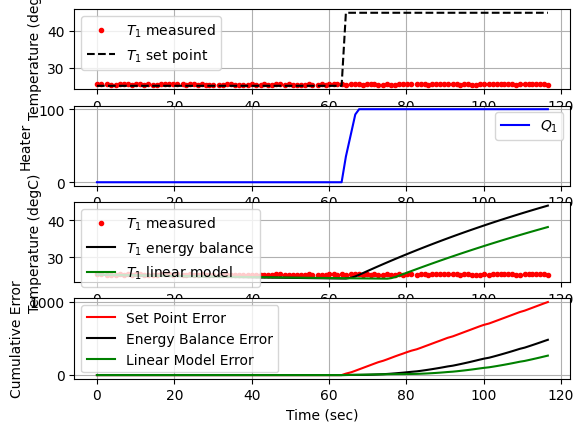

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
 118.9  45.00  25.37 100.00   8.74  84.09  -0.00


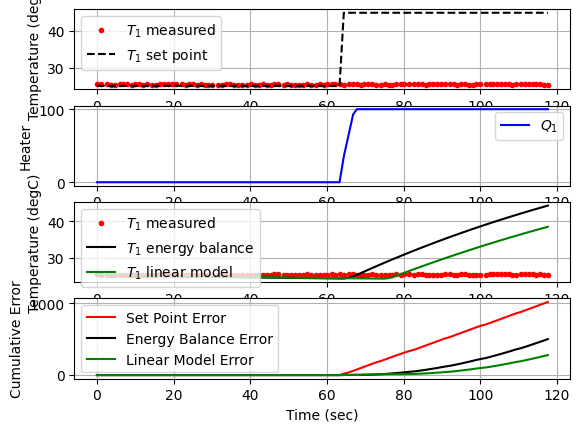

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
 119.9  45.00  25.44 100.00   8.71  84.09  -0.01


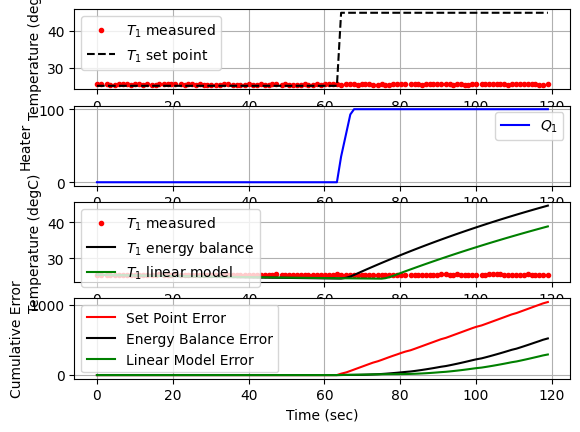

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
 120.9  45.00  25.37 100.00   8.74  84.09   0.01
Shutting down
Arduino disconnected successfully
Arduino disconnected successfully


True

<Figure size 640x480 with 0 Axes>

In [8]:
######################################################
# Do not adjust anything below this point            #
######################################################

# Connect to Arduino
a = itclab.iTCLab()
#a.encode('utf-8').strip()#modification error
# Turn LED on
print('LED On')
a.LED(100)

# Run time in minutes
run_time = 15.0

# Number of cycles
loops = int(60.0*run_time)
tm = np.zeros(loops)

# Temperature
# set point (degC)
Tsp1 = np.ones(loops) * 25.0 
Tsp1[60:] = 45.0
Tsp1[360:] = 30.0
Tsp1[660:] = 35.0
T1 = np.ones(loops) * a.T1 # measured T (degC)
error_sp = np.zeros(loops)

Tsp2 = np.ones(loops) * 23.0 # set point (degC)
T2 = np.ones(loops) * a.T2 # measured T (degC)

# Predictions
Tp = np.ones(loops) * a.T1
error_eb = np.zeros(loops)
Tpl = np.ones(loops) * a.T1
error_fopdt = np.zeros(loops)

# impulse tests (0 - 100%)
Q1 = np.ones(loops) * 0.0
Q2 = np.ones(loops) * 0.0

print('Running Main Loop. Ctrl-C to end.')
print('  Time     SP     PV     Q1   =  P   +  I  +   D')
print(('{:6.1f} {:6.2f} {:6.2f} ' + \
       '{:6.2f} {:6.2f} {:6.2f} {:6.2f}').format( \
           tm[0],Tsp1[0],T1[0], \
           Q1[0],0.0,0.0,0.0))

# Create plot
plt.figure(figsize=(10,7))
plt.ion()
plt.show()

# Main Loop
start_time = time.time()
prev_time = start_time
# Integral error
ierr = 0.0
try:
    for i in range(1,loops):
        # Sleep time
        sleep_max = 1.0
        sleep = sleep_max - (time.time() - prev_time)
        if sleep>=0.01:
            time.sleep(sleep-0.01)
        else:
            time.sleep(0.01)

        # Record time and change in time
        t = time.time()
        dt = t - prev_time
        prev_time = t
        tm[i] = t - start_time

        # Read temperatures in Kelvin 
        T1[i] = a.T1
        T2[i] = a.T2

        # Simulate one time step with Energy Balance
        Tnext = odeint(heat,Tp[i-1]+273.15,[0,dt],args=(Q1[i-1],))
        Tp[i] = Tnext[1]-273.15

        # Simulate one time step with linear FOPDT model
        z = np.exp(-dt/tauP)
        Tpl[i] = (Tpl[i-1]-Tss) * z \
                 + (Q1[max(0,i-int(thetaP)-1)]-Qss)*(1-z)*Kp \
                 + Tss

        # Calculate PID Output (Choose one of them)
        # 1. Manually Choosen
#         [Q1[i],P,ierr,D] = pid(Tsp1[i],T1[i],T1[i-1],ierr,dt)

        # 2. Based on Deep Learning Result
        [Q1[i],P,ierr,D] = pid_dl(Tsp1[i],T1[i],T1[i-1],ierr,dt)

        # Start setpoint error accumulation after 1 minute (60 seconds)
        if i>=60:
            error_eb[i] = error_eb[i-1] + abs(Tp[i]-T1[i])
            error_fopdt[i] = error_fopdt[i-1] + abs(Tpl[i]-T1[i])
            error_sp[i] = error_sp[i-1] + abs(Tsp1[i]-T1[i])

        # Write output (0-100)
        a.Q1(Q1[i])
        a.Q2(0.0)

        # Print line of data
        print(('{:6.1f} {:6.2f} {:6.2f} ' + \
              '{:6.2f} {:6.2f} {:6.2f} {:6.2f}').format( \
                  tm[i],Tsp1[i],T1[i], \
                  Q1[i],P,ierr,D))
        
        # Publish data to MQTT Broker
        pub_sp = client.publish('SetPoint', Tsp1[i])
        pub_pv1 = client.publish('Suhu1', T1[i])
        pub_op = client.publish('Nilai_op', Q1[i])

        # Plot
        plt.clf()
        ax=plt.subplot(4,1,1)
        ax.grid()
        plt.plot(tm[0:i],T1[0:i],'r.',label=r'$T_1$ measured')
        plt.plot(tm[0:i],Tsp1[0:i],'k--',label=r'$T_1$ set point')
        plt.ylabel('Temperature (degC)')
        plt.legend(loc=2)
        ax=plt.subplot(4,1,2)
        ax.grid()
        plt.plot(tm[0:i],Q1[0:i],'b-',label=r'$Q_1$')
        plt.ylabel('Heater')
        plt.legend(loc='best')
        ax=plt.subplot(4,1,3)
        ax.grid()
        plt.plot(tm[0:i],T1[0:i],'r.',label=r'$T_1$ measured')
        plt.plot(tm[0:i],Tp[0:i],'k-',label=r'$T_1$ energy balance')
        plt.plot(tm[0:i],Tpl[0:i],'g-',label=r'$T_1$ linear model')
        plt.ylabel('Temperature (degC)')
        plt.legend(loc=2)
        ax=plt.subplot(4,1,4)
        ax.grid()
        plt.plot(tm[0:i],error_sp[0:i],'r-',label='Set Point Error')
        plt.plot(tm[0:i],error_eb[0:i],'k-',label='Energy Balance Error')
        plt.plot(tm[0:i],error_fopdt[0:i],'g-',label='Linear Model Error')
        plt.ylabel('Cumulative Error')
        plt.legend(loc='best')
        plt.xlabel('Time (sec)')
        plt.draw()
        plt.pause(0.05)

    # Turn off heaters
    a.Q1(0)
    a.Q2(0)
    # Save figure
    plt.savefig('test_PID_dl.png')

# Allow user to end loop with Ctrl-C           
except KeyboardInterrupt:
    # Disconnect from Arduino
    a.Q1(0)
    a.Q2(0)
    print('Shutting down')
    a.close()
    plt.savefig('test_PID_dl.png')

# Make sure serial connection still closes when there's an error
except:           
    # Disconnect from Arduino
    a.Q1(0)
    a.Q2(0)
    print('Error: Shutting down')
    a.close()
    plt.savefig('test_PID_dl.png')
    raise

a.close()

In [ ]:
a.close()